In [0]:
# IMPORTING THE FRAME WORKS THAT ARE REQUIRED FOR THE CRED'X PROJECT THAT IS REQUIRED TO BUILD A CREDIT SCORE CARD.

In [0]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [0]:
# Importing Pandas and NumPy andnrequired library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# # ImportingDemographic dataset
demo = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/cap/Demographic data.csv')
#demo = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Demographic data.csv')

#Making a copy of original dataset as its required for random forest and other analysis

demo_original=demo.copy()

In [0]:
demo.head(5)

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [0]:
#Importing Credit Bereau data set
credit = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/cap/Credit Bureau data.csv')
#credit = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Credit Bureau data.csv')

#Making a copy of original dataset as its required for random forest and other analysis
credit_original=credit.copy()

In [0]:
credit.head(5)

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
0,954457215,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0


In [0]:
# Basic Data Exploratory Data Analysis

In [0]:
# Inspecting the Dataframes Demographic and credit dataframe and then will merge then

In [0]:
#Inspecting the Credit Dataframe

In [0]:
# Size of the Data Frame
credit.shape

(71295, 19)

In [0]:
# let's look at the statistical aspects of the dataframe
credit.describe()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
count,7.129500e+04,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,70237.000000,71294.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71023.000000,7.102300e+04,71295.000000,71295.000000,69870.000000
mean,4.989601e+08,0.270313,0.430535,0.577207,0.450340,0.655488,0.800912,29.696926,2.298048,5.826888,1.206901,2.397447,1.763532,3.535241,0.256424,1.249163e+06,8.186633,0.084620,0.042193
std,2.885905e+08,0.534166,0.825334,1.074436,0.808387,1.089535,1.331940,29.533308,2.070191,5.065096,1.352936,2.420086,1.971294,3.582199,0.436662,1.278874e+06,7.090776,0.278318,0.201030
min,1.004500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.483719e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.115320e+05,3.000000,0.000000,0.000000
50%,4.975698e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,5.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.749920e+05,6.000000,0.000000,0.000000
75%,7.495868e+08,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,46.000000,3.000000,9.000000,2.000000,4.000000,3.000000,5.000000,1.000000,2.920796e+06,10.000000,0.000000,0.000000
max,1.000084e+09,3.000000,5.000000,7.000000,5.000000,7.000000,9.000000,113.000000,12.000000,28.000000,6.000000,12.000000,10.000000,20.000000,1.000000,5.218801e+06,44.000000,1.000000,1.000000


In [0]:
# Number of Columns and Detailed Information about each column
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 19 columns):
Application ID                                                     71295 non-null int64
No of times 90 DPD or worse in last 6 months                       71295 non-null int64
No of times 60 DPD or worse in last 6 months                       71295 non-null int64
No of times 30 DPD or worse in last 6 months                       71295 non-null int64
No of times 90 DPD or worse in last 12 months                      71295 non-null int64
No of times 60 DPD or worse in last 12 months                      71295 non-null int64
No of times 30 DPD or worse in last 12 months                      71295 non-null int64
Avgas CC Utilization in last 12 months                             70237 non-null float64
No of trades opened in last 6 months                               71294 non-null float64
No of trades opened in last 12 months                              71295 non-null int64
No of P

In [0]:
# Understanding the Data 
# The above output has given a clear information regarding the columns .
# The column names seems to give a clear understanding of the columns 
# Let's understand some important Domain Terms 
# 1> DPD - No of times customer has not paid his / her dues
# 2> CC - Credit Card Utilization 
# 3> Auto/Home Loan Present - Value = 1 = Yes

### Data Preparation

In [0]:
credit.head(5)

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
0,954457215,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0


In [0]:
credit.tail(5)

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
71290,254036864,1,2,4,1,3,6,NaN,3.0,9,3,5,4,6,0.0,1028144.0,8,0,0.0
71291,375231276,0,1,2,0,1,2,NaN,4.0,11,3,6,2,4,1.0,3564911.0,9,0,1.0
71292,32481239,0,1,2,1,3,2,NaN,1.0,8,1,5,2,4,1.0,3386883.0,7,0,0.0
71293,704812159,2,2,4,3,4,5,62.0,3.0,10,3,5,4,6,1.0,3475822.0,9,0,0.0
71294,37493797,2,3,4,3,4,5,33.0,2.0,5,2,3,3,5,1.0,3088029.0,4,0,0.0


In [0]:
# Adding up the missing values (column-wise)
credit.isnull().sum()

Application ID                                                        0
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                          0
No of times 90 DPD or worse in last 12 months                         0
No of times 60 DPD or worse in last 12 months                         0
No of times 30 DPD or worse in last 12 months                         0
Avgas CC Utilization in last 12 months                             1058
No of trades opened in last 6 months                                  1
No of trades opened in last 12 months                                 0
No of PL trades opened in last 6 months                               0
No of PL trades opened in last 12 months                              0
No of Inquiries in last 6 months (excluding home & auto loans)        0
No of Inquiries in last 12 months (excluding home & auto loans) 

In [0]:
# Checking percentage of  missing values
round(100*(credit.isnull().sum()/len(credit.index)),2)

Application ID                                                     0.00
No of times 90 DPD or worse in last 6 months                       0.00
No of times 60 DPD or worse in last 6 months                       0.00
No of times 30 DPD or worse in last 6 months                       0.00
No of times 90 DPD or worse in last 12 months                      0.00
No of times 60 DPD or worse in last 12 months                      0.00
No of times 30 DPD or worse in last 12 months                      0.00
Avgas CC Utilization in last 12 months                             1.48
No of trades opened in last 6 months                               0.00
No of trades opened in last 12 months                              0.00
No of PL trades opened in last 6 months                            0.00
No of PL trades opened in last 12 months                           0.00
No of Inquiries in last 6 months (excluding home & auto loans)     0.00
No of Inquiries in last 12 months (excluding home & auto loans) 

In [0]:
# 1.48% of the rows have missing credit card utilization
# 2 % of the total rows have missing performance tags 

In [0]:
# Looking at the columns infomration, there seens to be missing data in few columns
# 1) Avg CC utilization
# 2) Presence of open home loan 
# 3) Outstanding Balance
# 4) Presence of open auto loan
# 5) Performance Tag

In [0]:
# As per given assumptions in the problem statement 
# 1.Missing Credit Card Utilization - Does not have a credit card
# 2.Performance Tag is null means the application for the credit card was rejected.

In [0]:
# Let's check if appilcation ID are unique or we have a repeated data
print(any(credit['Application ID'].duplicated()))

True


In [0]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
credit.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
count,7.129500e+04,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,70237.000000,71294.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71023.000000,7.102300e+04,71295.000000,71295.000000,69870.000000
mean,4.989601e+08,0.270313,0.430535,0.577207,0.450340,0.655488,0.800912,29.696926,2.298048,5.826888,1.206901,2.397447,1.763532,3.535241,0.256424,1.249163e+06,8.186633,0.084620,0.042193
std,2.885905e+08,0.534166,0.825334,1.074436,0.808387,1.089535,1.331940,29.533308,2.070191,5.065096,1.352936,2.420086,1.971294,3.582199,0.436662,1.278874e+06,7.090776,0.278318,0.201030
min,1.004500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.483719e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.115320e+05,3.000000,0.000000,0.000000
50%,4.975698e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,5.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.749920e+05,6.000000,0.000000,0.000000
75%,7.495868e+08,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,46.000000,3.000000,9.000000,2.000000,4.000000,3.000000,5.000000,1.000000,2.920796e+06,10.000000,0.000000,0.000000
90%,8.994646e+08,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,73.000000,5.000000,13.000000,3.000000,6.000000,5.000000,9.000000,1.000000,3.275863e+06,20.000000,0.000000,0.000000
95%,9.492921e+08,1.000000,2.000000,3.000000,2.000000,3.000000,4.000000,103.000000,7.000000,16.000000,4.000000,7.000000,6.000000,11.000000,1.000000,3.645896e+06,25.000000,1.000000,0.000000
99%,9.895336e+08,2.000000,3.000000,5.000000,3.000000,5.000000,6.000000,113.000000,9.000000,21.000000,5.000000,9.000000,8.000000,15.000000,1.000000,4.249692e+06,31.000000,1.000000,1.000000


Checking for Missing Values and Inputing Them

In [0]:
# Baic Exploratory Data Analysis of demographic dataframe

In [0]:
# Size of the Data Frame
demo.shape

(71295, 12)

In [0]:
demo.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [0]:
demo.tail()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
71290,254036864,44,M,Married,3.0,15.0,Professional,SAL,Rented,6,3,0.0
71291,375231276,24,M,Single,1.0,4.5,Bachelor,SAL,Owned,20,7,1.0
71292,32481239,33,M,Married,4.0,6.0,Bachelor,SE_PROF,Rented,37,25,0.0
71293,704812159,52,M,Married,3.0,4.5,Bachelor,SE,Rented,76,57,0.0
71294,37493797,54,M,Married,3.0,42.0,Bachelor,SE,Rented,96,29,0.0


In [0]:
## Let's see the type of each column

demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 71295 non-null int64
Age                                            71295 non-null int64
Gender                                         71293 non-null object
Marital Status (at the time of application)    71289 non-null object
No of dependents                               71292 non-null float64
Income                                         71295 non-null float64
Education                                      71176 non-null object
Profession                                     71281 non-null object
Type of residence                              71287 non-null object
No of months in current residence              71295 non-null int64
No of months in current company                71295 non-null int64
Performance Tag                                69870 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 6.5+ MB


In [0]:
# Adding up the missing values (column-wise)
demo.isnull().sum()

Application ID                                    0
Age                                               0
Gender                                            2
Marital Status (at the time of application)       6
No of dependents                                  3
Income                                            0
Education                                       119
Profession                                       14
Type of residence                                 8
No of months in current residence                 0
No of months in current company                   0
Performance Tag                                1425
dtype: int64

In [0]:
# Observed Missing Values in Gender , Marital Status , No of Dependents, Education, Profession, Types of Residence, Performance Tag

In [0]:
# let's look at the statistical aspects of the dataframe
demo.describe()

,Application ID,Age,No of dependents,Income,No of months in current residence,No of months in current company,Performance Tag
count,7.129500e+04,71295.000000,71292.000000,71295.000000,71295.000000,71295.000000,69870.000000
mean,4.989601e+08,44.943039,2.865188,27.195224,34.563420,33.958244,0.042193
std,2.885905e+08,9.939211,1.382319,15.514626,36.759758,20.410824,0.201030
min,1.004500e+05,-3.000000,1.000000,-0.500000,6.000000,3.000000,0.000000
25%,2.483719e+08,37.000000,2.000000,14.000000,6.000000,16.000000,0.000000
50%,4.975698e+08,45.000000,3.000000,27.000000,11.000000,34.000000,0.000000
75%,7.495868e+08,53.000000,4.000000,40.000000,60.000000,51.000000,0.000000
max,1.000084e+09,65.000000,5.000000,60.000000,126.000000,133.000000,1.000000


In [0]:
demo.Gender.isnull().sum()

2

In [0]:
# let's look at the statistical aspects of the dataframe# Checking the percentage of missing values
round(100 * (demo.isnull().sum() / len(demo.index)), 2)

Application ID                                 0.00
Age                                            0.00
Gender                                         0.00
Marital Status (at the time of application)    0.01
No of dependents                               0.00
Income                                         0.00
Education                                      0.17
Profession                                     0.02
Type of residence                              0.01
No of months in current residence              0.00
No of months in current company                0.00
Performance Tag                                2.00
dtype: float64

In [0]:
# 0.01% of the total data in Marital Status is null
# 0.17% of the total data in Education is null
# 0.02% of the total data in Profession is null
# 2.00% of the total data in performance tag is null 

In [0]:
# Observed Missing Values in Demo Data Frame
# Gender
# Marital Status 
# No of Dependents
# Education, 
# Profession
# Types of Residence
# Performance Tag
# Observed Missing Values in Credit Data Frame
# Presence of home loan 
# Outstanding Balance
# Avg Credit Card Utilization
# Performance Tag

In [0]:
#1. Performing required cleansing on the demographic data frame

In [0]:
demo.dropna(subset = ['Gender'], inplace = True)

In [0]:
demo.dropna(subset=['Marital Status (at the time of application)'], inplace = True)

In [0]:
demo.dropna(subset = ['Education'], inplace = True)

In [0]:
demo.dropna(subset = ['Profession '],inplace = True)

In [0]:
demo.dropna(subset = ['Type of residence'], inplace = True)

In [0]:
demo.dropna(subset = ['Type of residence'], inplace =  True)

In [0]:
demo.dropna(subset = ['No of dependents'], inplace = True)

In [0]:
demo.dropna(subset = ['No of dependents'], inplace = True)

In [0]:
# checking for null values dropped
demo.isnull().sum()

Application ID                                    0
Age                                               0
Gender                                            0
Marital Status (at the time of application)       0
No of dependents                                  0
Income                                            0
Education                                         0
Profession                                        0
Type of residence                                 0
No of months in current residence                 0
No of months in current company                   0
Performance Tag                                1423
dtype: int64

In [0]:
# dropping null values in performace tag also
demo.dropna(subset = ['Performance Tag'], inplace = True)

OUTLIER DETECTION

In [0]:
#there are outlier people with negative age'as we are using weight of evidence and it willl handle the outlier treatment we are not manually dropping or treating them
# Assumption : People below 18 years arenot issued credit cards

In [0]:
demo = demo[(demo['Age'] > 17)]

In [0]:
demo['Age'].unique()

array([48, 31, 32, 43, 35, 42, 34, 30, 22, 37, 41, 38, 33, 45, 51, 36, 29,
       40, 20, 19, 25, 28, 50, 27, 26, 49, 47, 39, 44, 23, 46, 52, 53, 24,
       18, 21, 64, 56, 55, 60, 59, 54, 58, 62, 65, 61, 57, 63])

In [0]:
demo[demo['Income'] < 0]

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
964,450723469,34,M,Married,2.0,-0.5,Masters,SAL,Rented,99,57,0.0
1058,24806681,22,M,Single,1.0,-0.5,Masters,SAL,Rented,93,57,0.0
1222,729552057,40,M,Married,3.0,-0.5,Professional,SE_PROF,Rented,113,43,0.0
1278,805216817,32,M,Married,3.0,-0.5,Professional,SAL,Owned,109,51,0.0
1288,547253197,64,M,Married,5.0,-0.5,Professional,SAL,Rented,108,52,0.0
1343,373963488,48,M,Married,3.0,-0.5,Professional,SAL,Rented,113,57,0.0
1463,60246058,35,M,Married,3.0,-0.5,Professional,SAL,Owned,111,53,0.0
1565,861750337,52,M,Married,5.0,-0.5,Bachelor,SAL,Owned,89,53,1.0
1620,342846642,51,M,Married,3.0,-0.5,Bachelor,SE,Rented,112,58,0.0
1731,671827529,41,M,Married,2.0,-0.5,Masters,SAL,Owned,114,33,0.0


In [0]:
demo = demo.loc[demo['Income']>0]

In [0]:
demo.shape

(69554, 12)

In [0]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69554 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 69554 non-null int64
Age                                            69554 non-null int64
Gender                                         69554 non-null object
Marital Status (at the time of application)    69554 non-null object
No of dependents                               69554 non-null float64
Income                                         69554 non-null float64
Education                                      69554 non-null object
Profession                                     69554 non-null object
Type of residence                              69554 non-null object
No of months in current residence              69554 non-null int64
No of months in current company                69554 non-null int64
Performance Tag                                69554 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 6.9+ MB


In [0]:
## Clening the Credit data frame
credit.drop_duplicates('Application ID', inplace = True)

In [0]:
# 1. Home Loan
credit.dropna(subset=['Presence of open home loan'], inplace = True)

In [0]:
# 2. Balance
credit.dropna(subset=['Outstanding Balance'], inplace = True)

In [0]:
# 3. Performance Tag
credit.dropna(subset=['Performance Tag'], inplace = True)

In [0]:
# 4. Credit Card Utilization 
credit.dropna(subset=['Avgas CC Utilization in last 12 months'], inplace = True)

In [0]:
credit.isnull().sum()

Application ID                                                     0
No of times 90 DPD or worse in last 6 months                       0
No of times 60 DPD or worse in last 6 months                       0
No of times 30 DPD or worse in last 6 months                       0
No of times 90 DPD or worse in last 12 months                      0
No of times 60 DPD or worse in last 12 months                      0
No of times 30 DPD or worse in last 12 months                      0
Avgas CC Utilization in last 12 months                             0
No of trades opened in last 6 months                               0
No of trades opened in last 12 months                              0
No of PL trades opened in last 6 months                            0
No of PL trades opened in last 12 months                           0
No of Inquiries in last 6 months (excluding home & auto loans)     0
No of Inquiries in last 12 months (excluding home & auto loans)    0
Presence of open home loan        

In [0]:
credit.shape

(68844, 19)

In [0]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68844 entries, 0 to 71294
Data columns (total 19 columns):
Application ID                                                     68844 non-null int64
No of times 90 DPD or worse in last 6 months                       68844 non-null int64
No of times 60 DPD or worse in last 6 months                       68844 non-null int64
No of times 30 DPD or worse in last 6 months                       68844 non-null int64
No of times 90 DPD or worse in last 12 months                      68844 non-null int64
No of times 60 DPD or worse in last 12 months                      68844 non-null int64
No of times 30 DPD or worse in last 12 months                      68844 non-null int64
Avgas CC Utilization in last 12 months                             68844 non-null float64
No of trades opened in last 6 months                               68844 non-null float64
No of trades opened in last 12 months                              68844 non-null int64
No of P

In [0]:
# The two Data frames are cleaed and named as credit and demo

In [0]:
# Merge the Data Frame

In [0]:

Merge_df= demo.merge(credit,on=['Application ID','Performance Tag'],how='left')

Merge_df_original = Merge_df
## merge_df_original is for random forest

In [0]:
Merge_df_original["Performance Tag"].isnull().sum()

0

In [0]:
original_cols = [x for x in list(Merge_df.columns) if x not in ('Application ID','Performance Tag')]
original_cols

['Age',
 'Gender',
 'Marital Status (at the time of application)',
 'No of dependents',
 'Income',
 'Education',
 'Profession ',
 'Type of residence',
 'No of months in current residence',
 'No of months in current company',
 'No of times 90 DPD or worse in last 6 months',
 'No of times 60 DPD or worse in last 6 months',
 'No of times 30 DPD or worse in last 6 months',
 'No of times 90 DPD or worse in last 12 months',
 'No of times 60 DPD or worse in last 12 months',
 'No of times 30 DPD or worse in last 12 months',
 'Avgas CC Utilization in last 12 months',
 'No of trades opened in last 6 months',
 'No of trades opened in last 12 months',
 'No of PL trades opened in last 6 months',
 'No of PL trades opened in last 12 months',
 'No of Inquiries in last 6 months (excluding home & auto loans)',
 'No of Inquiries in last 12 months (excluding home & auto loans)',
 'Presence of open home loan',
 'Outstanding Balance',
 'Total No of Trades',
 'Presence of open auto loan']

In [0]:
original_cols_Demo = [x for x in list(demo.columns) if x not in ('Application ID','Performance Tag')]
original_cols_Demo
# original_cols = original_cols.remove('Performance Tag')

['Age',
 'Gender',
 'Marital Status (at the time of application)',
 'No of dependents',
 'Income',
 'Education',
 'Profession ',
 'Type of residence',
 'No of months in current residence',
 'No of months in current company']

In [0]:
Merge_df.head(2)

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,2999395.0,4.0,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,3078.0,5.0,0.0


In [0]:
Merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69554 entries, 0 to 69553
Data columns (total 29 columns):
Application ID                                                     69554 non-null int64
Age                                                                69554 non-null int64
Gender                                                             69554 non-null object
Marital Status (at the time of application)                        69554 non-null object
No of dependents                                                   69554 non-null float64
Income                                                             69554 non-null float64
Education                                                          69554 non-null object
Profession                                                         69554 non-null object
Type of residence                                                  69554 non-null object
No of months in current residence                                  69554 non-null int64
No

In [0]:
Merge_df.shape

(69554, 29)

In [0]:
Merge_df.isnull().sum()

Application ID                                                        0
Age                                                                   0
Gender                                                                0
Marital Status (at the time of application)                           0
No of dependents                                                      0
Income                                                                0
Education                                                             0
Profession                                                            0
Type of residence                                                     0
No of months in current residence                                     0
No of months in current company                                       0
Performance Tag                                                       0
No of times 90 DPD or worse in last 6 months                       1016
No of times 60 DPD or worse in last 6 months                    

In [0]:
#App=App.dropna(axis = 0, how ='any')
Merge_df=Merge_df.fillna(0)

In [0]:
Merge_df.isnull().sum()

Application ID                                                     0
Age                                                                0
Gender                                                             0
Marital Status (at the time of application)                        0
No of dependents                                                   0
Income                                                             0
Education                                                          0
Profession                                                         0
Type of residence                                                  0
No of months in current residence                                  0
No of months in current company                                    0
Performance Tag                                                    0
No of times 90 DPD or worse in last 6 months                       0
No of times 60 DPD or worse in last 6 months                       0
No of times 30 DPD or worse in las

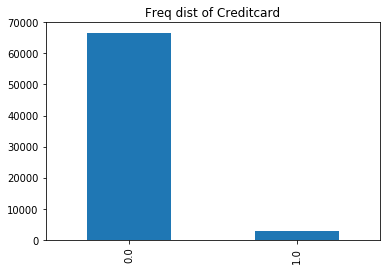

In [0]:
Merge_df_original["Performance Tag"].value_counts().plot.bar(title='Freq dist of Creditcard')


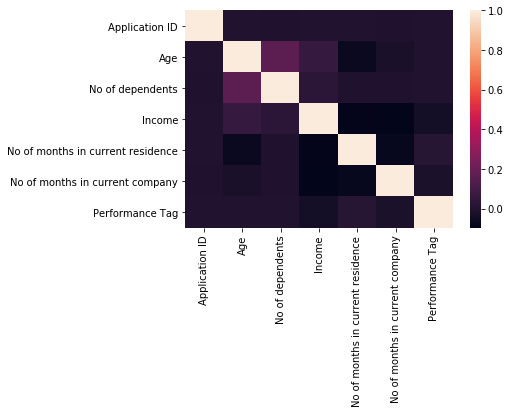

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corr = demo.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

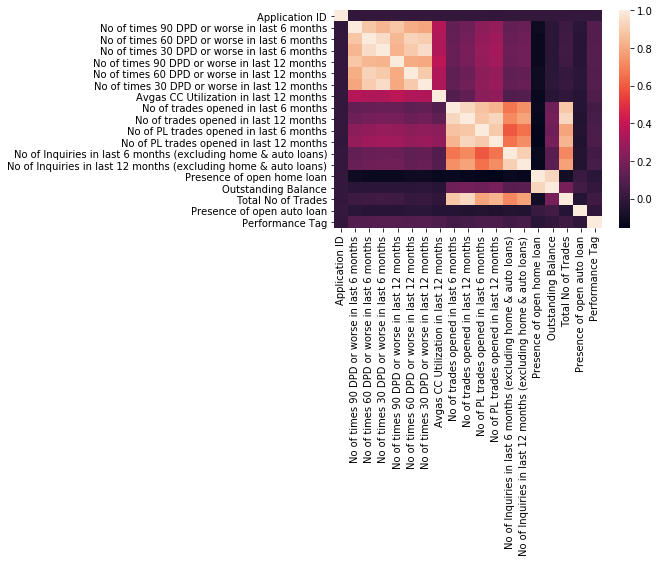

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corr = credit.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

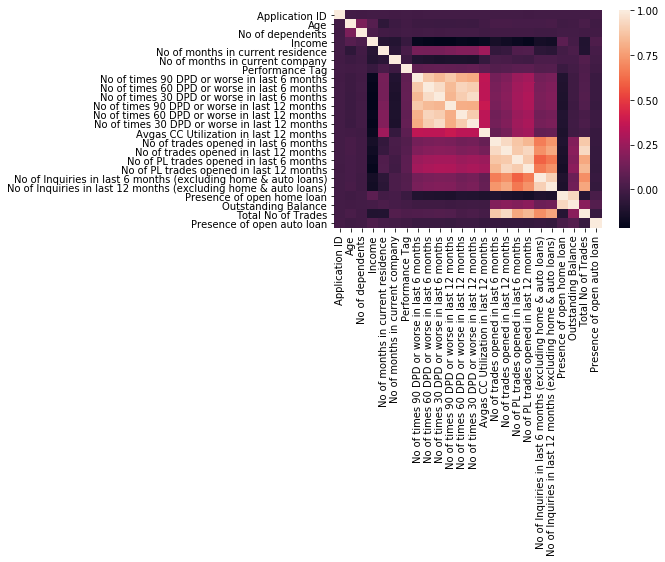

In [0]:
corr = Merge_df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()

### EDA on demographic dataset

In [0]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
demo.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Application ID,Age,No of dependents,Income,No of months in current residence,No of months in current company,Performance Tag
count,6.955400e+04,69554.000000,69554.000000,69554.000000,69554.000000,69554.000000,69554.000000
mean,4.992757e+08,45.039394,2.860094,27.454453,34.467392,34.176323,0.042269
std,2.885876e+08,9.876179,1.385712,15.450941,36.767325,20.358110,0.201204
min,1.004500e+05,18.000000,1.000000,1.000000,6.000000,3.000000,0.000000
25%,2.485649e+08,38.000000,2.000000,14.000000,6.000000,16.000000,0.000000
50%,4.982027e+08,45.000000,3.000000,27.000000,10.000000,34.000000,0.000000
75%,7.499537e+08,53.000000,4.000000,40.000000,60.000000,51.000000,0.000000
90%,8.995721e+08,58.000000,5.000000,49.000000,98.000000,62.000000,0.000000
95%,9.494459e+08,62.000000,5.000000,54.000000,110.000000,68.000000,0.000000
99%,9.895842e+08,65.000000,5.000000,59.000000,122.000000,74.000000,1.000000


{'boxes': [<matplotlib.lines.Line2D at 0x7fcf73cedf60>],
 'caps': [<matplotlib.lines.Line2D at 0x7fcf73cf97b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcf73d051d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fcf73cf9e48>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fcf73cf9128>,
  <matplotlib.lines.Line2D at 0x7fcf73cf9470>]}

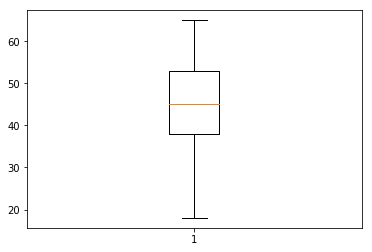

In [0]:
plt.boxplot(demo["Age"])

{'boxes': [<matplotlib.lines.Line2D at 0x7fcf73c4e278>],
 'caps': [<matplotlib.lines.Line2D at 0x7fcf73c4ea90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcf73c564a8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fcf73c56160>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fcf73c4e3c8>,
  <matplotlib.lines.Line2D at 0x7fcf73c4e748>]}

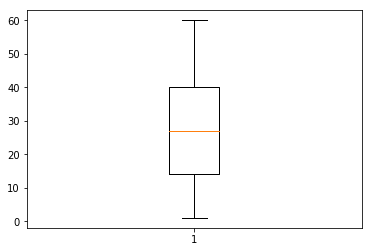

In [0]:
plt.boxplot(demo["Income"])

UNIVARIATE AND BIVARIATE ANALYSIS


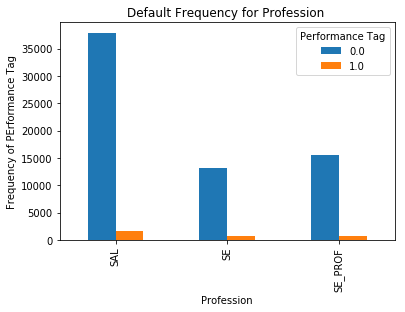

In [0]:
#Status of customer performance (" 1 represents "Default")
%matplotlib inline
pd.crosstab(demo["Profession "]
            ,demo["Performance Tag"]).plot(kind='bar')
plt.title('Default Frequency for Profession ')
plt.xlabel('Profession')
plt.ylabel('Frequency of PErformance Tag')
plt.savefig('Default_fre_job')

The Default of the credit card depends a great deal on the Profession. Thus, the Profession can be a good predictor of the outcome variable

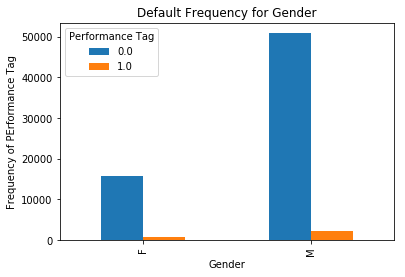

In [0]:
#Status of customer performance (" 1 represents "Default")
%matplotlib inline
pd.crosstab(demo["Gender"]
            ,demo["Performance Tag"]).plot(kind='bar')
plt.title('Default Frequency for Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency of PErformance Tag')
plt.savefig('Default_fre_Gender')

The Default of the credit card depends a great deal on the Gender. Thus, the Gender can be a good predictor of the outcome variable

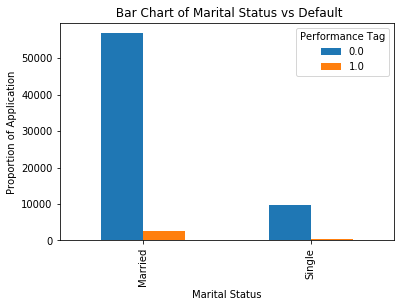

In [0]:
pd.crosstab(demo["Marital Status (at the time of application)"]
            ,demo["Performance Tag"]).plot(kind='bar')
#table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title(' Bar Chart of Marital Status vs Default')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Application')
plt.savefig('mariral_vs_pur_stack')

The marital status does not seem a strong predictor for the outcome variable

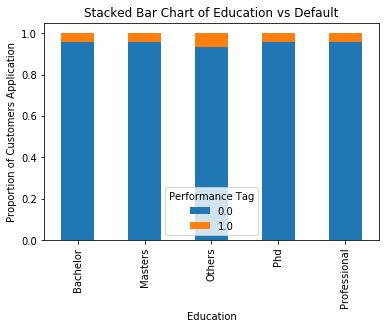

In [0]:
table=pd.crosstab(demo["Education"],demo["Performance Tag"])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Default')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers Application')
plt.savefig('Education_vs_pur_stack')





Education does not seems a good predictor of the outcome variable.

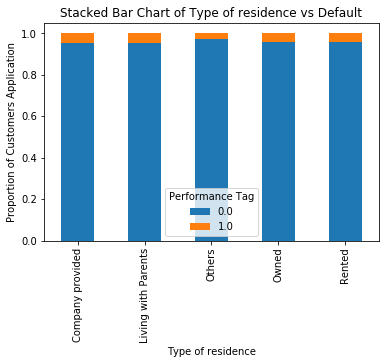

In [0]:
table=pd.crosstab(demo["Type of residence"],demo["Performance Tag"])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Type of residence vs Default')
plt.xlabel('Type of residence')
plt.ylabel('Proportion of Customers Application')
plt.savefig('type of residence_vs_pur_stack')





Type of residence does not seems a good predictor of the outcome variable.

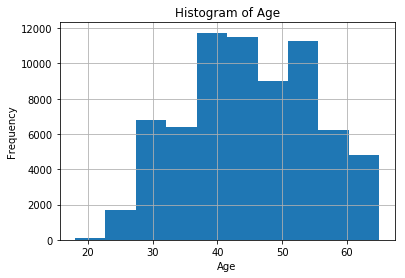

In [0]:
demo.Age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

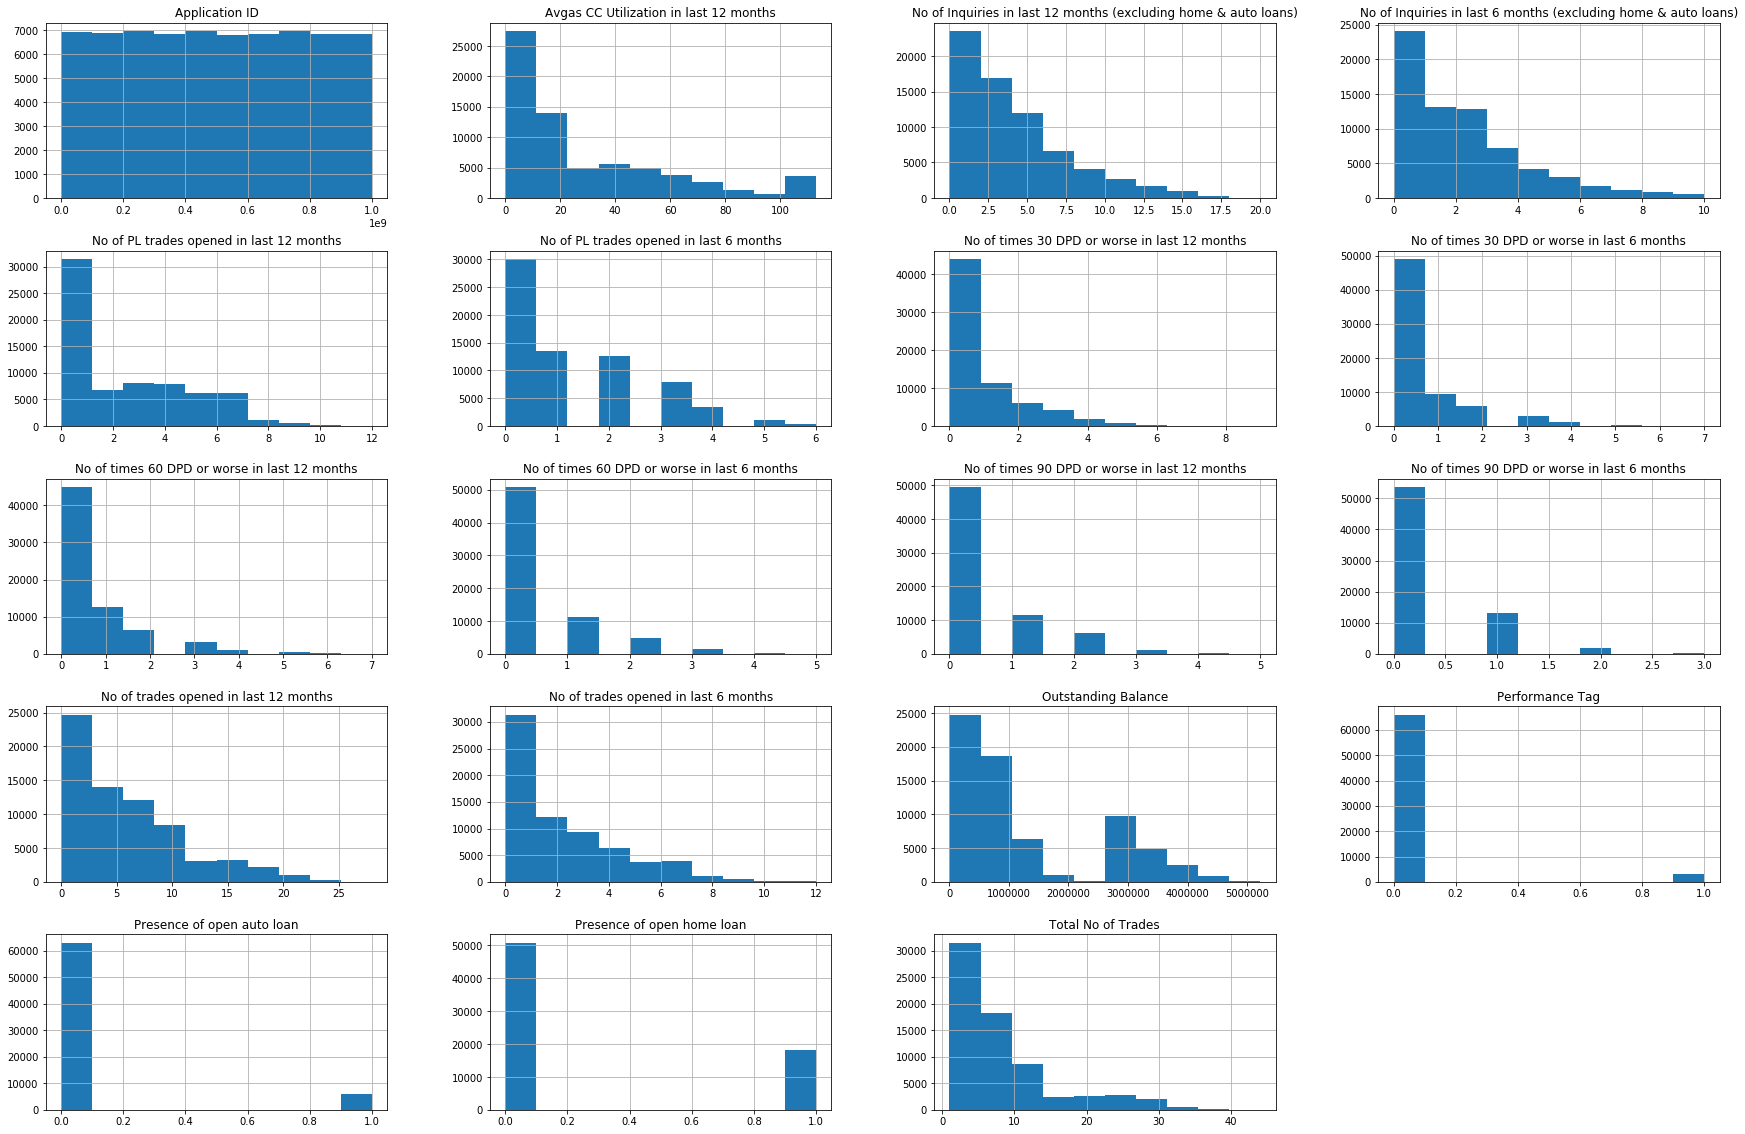

In [0]:
# Visualize Numeric Variable Distributions
credit.hist(figsize = (30, 20));

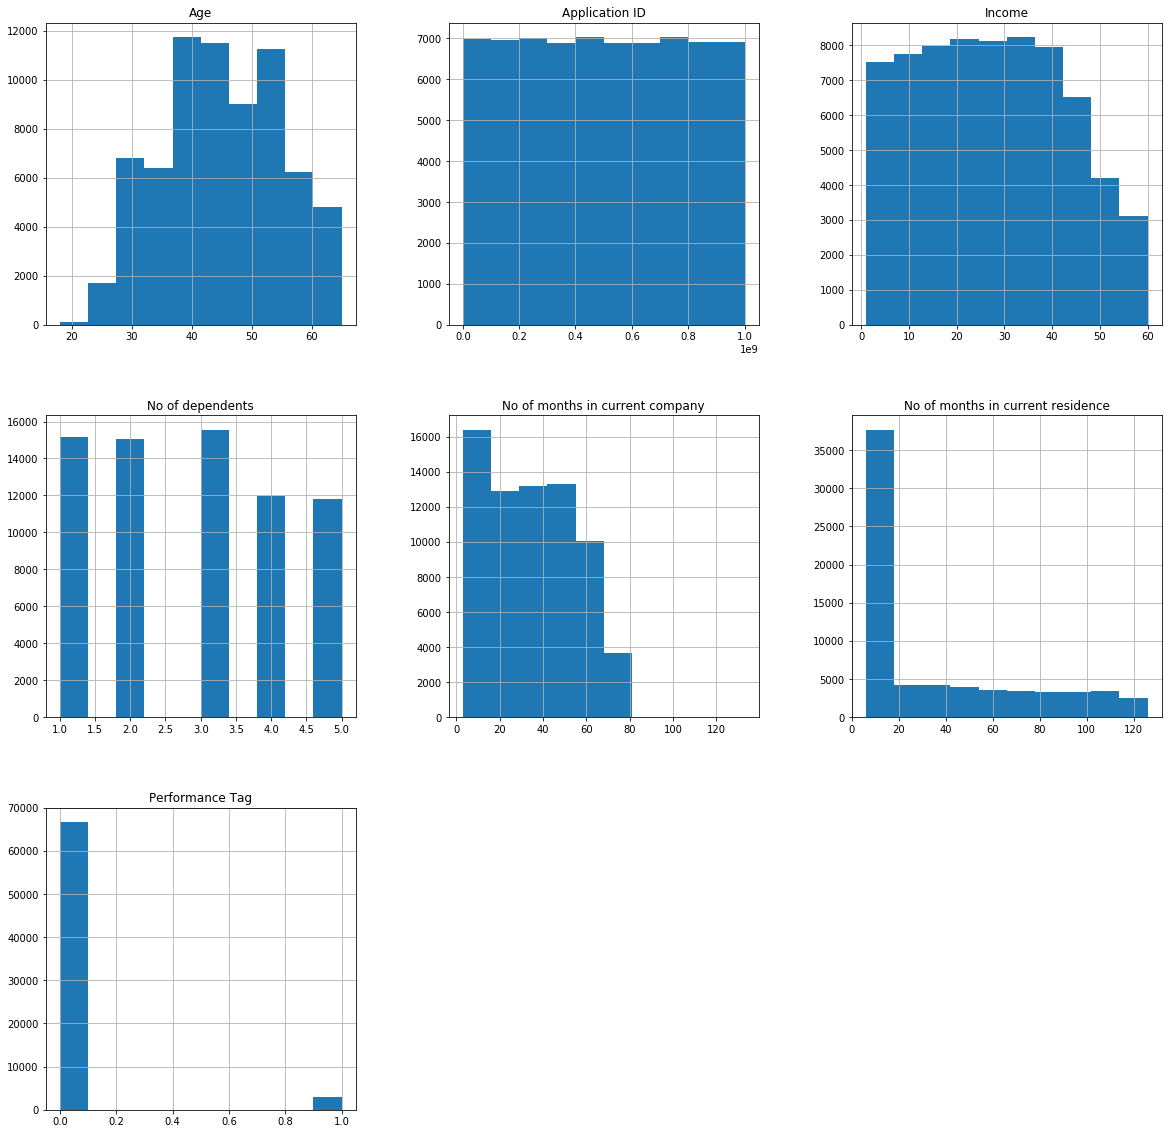

In [0]:
# Visualize Numeric Variable Distributions
demo.hist(figsize = (20, 20));

 Most of the customers of the bank in this dataset are in the age range of 30–60.

In [0]:
#Adding new column as target performance tag as target and droping the performance tag
Merge_df["target"]=Merge_df["Performance Tag"]
Merge_df=Merge_df.drop("Performance Tag",axis=1)

In [0]:
#Adding new column as target performance tag as target and droping the performance tag
demo["target"]=demo["Performance Tag"]
demo=demo.drop("Performance Tag",axis=1)

In [0]:
# Variable Selection using Python - WOE-Weight of evidence


Calculating woe

In [0]:
##perfroming WOE for demographic data set
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [0]:
final_iv, IV = data_vars(demo.drop(['Application ID','target'], axis = 1),demo["target"])

In [0]:
final_iv.shape

(34, 12)

In [0]:
final_iv.head(5)

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,Age,18,40,24455,1068.0,0.043672,23387.0,0.956328,0.363265,0.351082,0.034113,0.000727
1,Age,41,50,22789,956.0,0.041950,21833.0,0.958050,0.325170,0.327754,-0.007915,0.000727
2,Age,51,65,22310,916.0,0.041058,21394.0,0.958942,0.311565,0.321164,-0.030344,0.000727
3,Gender,F,F,16442,717.0,0.043608,15725.0,0.956392,0.243878,0.236061,0.032574,0.000335
4,Gender,M,M,53112,2223.0,0.041855,50889.0,0.958145,0.756122,0.763939,-0.010284,0.000335


In [0]:
IV.sort_values('IV')

,VAR_NAME,IV
5,No of dependents,0.000073
4,Marital Status (at the time of application),0.000107
2,Gender,0.000335
0,Age,0.000727
1,Education,0.000771
9,Type of residence,0.000906
8,Profession,0.002304
6,No of months in current company,0.010909
3,Income,0.038055
7,No of months in current residence,0.052718


In [0]:
final_iv.sort_values(by=['IV'], ascending=True, inplace=True)

Text(0.5, 1.0, 'Information Value by Features')

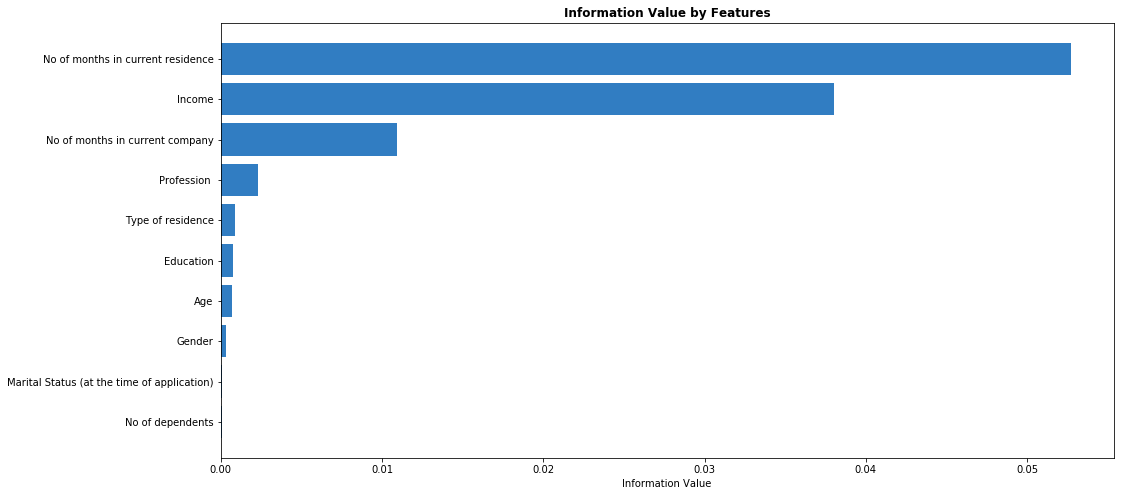

In [0]:
# Plot IV
plt.figure(figsize=(16,8))
plt.barh(final_iv['VAR_NAME'], final_iv['IV'], color = '#317DC2')
plt.xlabel('Information Value')
plt.title('Information Value by Features', fontweight="bold")

In [0]:
#Takinng the variables whose IV values are greater than0.02

final_iv = final_iv[final_iv['IV']>0.02]

APPlying /imputing WOE and IV values to the dataframe

In [0]:
transform_vars_list = demo.columns.difference(['target'])
transform_prefix = 'new_' # leave this value blank if you need replace the original column values

In [0]:
for var in transform_vars_list:
    small_df = final_iv[final_iv['VAR_NAME'] == var]
    transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            demo[transform_prefix + var] = demo[var].apply(lambda x: eval(replace_cmd))
        except:
            demo[transform_prefix + var] = demo[var].apply(lambda x: eval(replace_cmd1))

App.drop(["No of dependents","Type of residence","Profession ","Education","Outstanding Balance","No of months in current company","Presence of open auto loan","Presence of open home loan"],axis=0)

In [0]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69554 entries, 0 to 71294
Data columns (total 14 columns):
Application ID                                 69554 non-null int64
Age                                            69554 non-null int64
Gender                                         69554 non-null object
Marital Status (at the time of application)    69554 non-null object
No of dependents                               69554 non-null float64
Income                                         69554 non-null float64
Education                                      69554 non-null object
Profession                                     69554 non-null object
Type of residence                              69554 non-null object
No of months in current residence              69554 non-null int64
No of months in current company                69554 non-null int64
target                                         69554 non-null float64
new_Income                                     69554 non-null fl

In [0]:
demo.head(5)

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,target,new_Income,new_No of months in current residence
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0,-0.244878,0.208472
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0,-0.262360,0.208472
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0,-0.262360,0.208472
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0,-0.262360,0.208472
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0,-0.244878,0.208472


In [0]:
demo.shape

(69554, 14)

In [0]:
demo.drop(original_cols_Demo, axis = 1, inplace = True)

In [0]:
demo.columns

Index(['Application ID', 'target', 'new_Income',
       'new_No of months in current residence'],
      dtype='object')

In [0]:
demo.head(5)

,Application ID,target,new_Income,new_No of months in current residence
0,954457215,0.0,-0.244878,0.208472
1,432830445,0.0,-0.262360,0.208472
2,941387308,0.0,-0.262360,0.208472
3,392161677,0.0,-0.262360,0.208472
4,182011211,0.0,-0.244878,0.208472


IMPUTING WOE AND IV TO MERGED DATAFRAMED NAMED AS App


In [0]:
final_iv_merge, IV_merge = data_vars(Merge_df.drop(['Application ID','target'],axis =1 ),Merge_df["target"])

In [0]:
final_iv_merge.head(5)

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,Age,18,40,24455,1068.0,0.043672,23387.0,0.956328,0.363265,0.351082,0.034113,0.000727
1,Age,41,50,22789,956.0,0.041950,21833.0,0.958050,0.325170,0.327754,-0.007915,0.000727
2,Age,51,65,22310,916.0,0.041058,21394.0,0.958942,0.311565,0.321164,-0.030344,0.000727
3,Gender,F,F,16442,717.0,0.043608,15725.0,0.956392,0.243878,0.236061,0.032574,0.000335
4,Gender,M,M,53112,2223.0,0.041855,50889.0,0.958145,0.756122,0.763939,-0.010284,0.000335


In [0]:
IV_merge.sort_values('IV')

,VAR_NAME,IV
10,No of dependents,0.000073
5,Marital Status (at the time of application),0.000107
3,Gender,0.000335
0,Age,0.000727
2,Education,0.000771
26,Type of residence,0.000906
22,Presence of open auto loan,0.001566
24,Profession,0.002304
21,Outstanding Balance,0.008286
11,No of months in current company,0.010909


In [0]:
# Information Value (IV) to Determine Predictive Features
#var_info_df = pd.DataFrame(Demo['var'])
final_iv_merge.sort_values(by=['IV'], ascending=True, inplace=True)

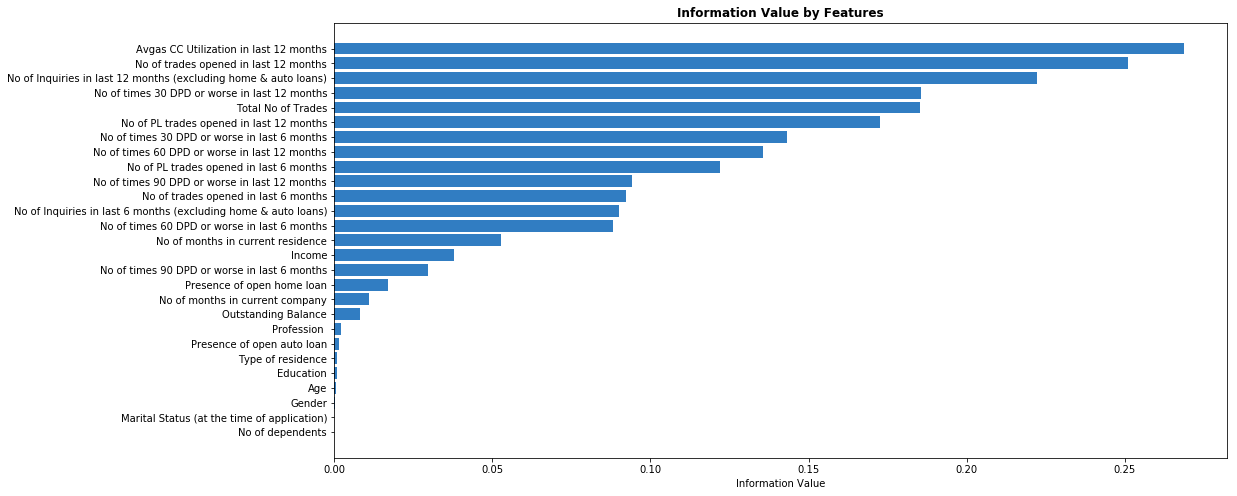

In [0]:
# Plot IV
plt.figure(figsize=(16,8))
plt.barh(final_iv_merge["VAR_NAME"], final_iv_merge['IV'],color ='#317DC2')
plt.xlabel('Information Value')
plt.title('Information Value by Features', fontweight="bold");

In [0]:
#Taking the variables whose IV values are greater than0.02

final_iv_merge = final_iv_merge[final_iv_merge['IV']>0.02]

In [0]:
transform_vars_list = Merge_df.columns.difference(['target'])
transform_prefix = 'new_' # leave this value blank if you need replace the original column values

In [0]:
transform_vars_list

Index(['Age', 'Application ID', 'Avgas CC Utilization in last 12 months',
       'Education', 'Gender', 'Income',
       'Marital Status (at the time of application)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of PL trades opened in last 12 months',
       'No of PL trades opened in last 6 months', 'No of dependents',
       'No of months in current company', 'No of months in current residence',
       'No of times 30 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 90 DPD or worse in last 6 months',
       'No of trades opened in last 12 months',
       'No of trades opened in last 6 months', 'Outstanding Balance',
       'Presence of open auto loan

In [0]:
for var in transform_vars_list:
    small_df = final_iv_merge[final_iv_merge['VAR_NAME'] == var]
    transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            Merge_df[transform_prefix + var] = Merge_df[var].apply(lambda x: eval(replace_cmd))
        except:
            Merge_df[transform_prefix + var] = Merge_df[var].apply(lambda x: eval(replace_cmd1))

In [0]:
Merge_df.head(5)

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,target,new_Avgas CC Utilization in last 12 months,new_Income,new_No of Inquiries in last 12 months (excluding home & auto loans),new_No of Inquiries in last 6 months (excluding home & auto loans),new_No of PL trades opened in last 12 months,new_No of PL trades opened in last 6 months,new_No of months in current residence,new_No of times 30 DPD or worse in last 12 months,new_No of times 30 DPD or worse in last 6 months,new_No of times 60 DPD or worse in last 12 months,new_No of times 60 DPD or worse in last 6 months,new_No of times 90 DPD or worse in last 12 months,new_No of times 90 DPD or worse in last 6 months,new_No of trades opened in last 12 months,new_No of trades opened in last 6 months,new_Total No of Trades
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,2999395.0,4.0,0.0,0.0,-0.721019,-0.244878,-0.812409,-0.314296,-0.447175,-0.310928,0.208472,-0.266654,-0.196277,-0.198837,-0.120088,-0.132252,-0.036002,-0.852267,-0.266086,-0.676791
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,3078.0,5.0,0.0,0.0,-0.721019,-0.262360,-0.812409,-0.314296,-0.447175,-0.310928,0.208472,-0.266654,-0.196277,-0.198837,-0.120088,-0.132252,-0.036002,-0.852267,-0.266086,0.209475
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3004972.0,2.0,0.0,0.0,-0.721019,-0.262360,-0.812409,-0.314296,-0.447175,-0.310928,0.208472,-0.266654,-0.196277,-0.198837,-0.120088,-0.132252,-0.036002,-0.852267,-0.266086,-0.676791
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0,0.0,0.0,0.0,0.0,0.0,11.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3355373.0,4.0,1.0,0.0,-0.584395,-0.262360,-0.812409,-0.314296,-0.447175,-0.310928,0.208472,-0.266654,-0.196277,-0.198837,-0.120088,-0.132252,-0.036002,-0.852267,-0.266086,-0.676791
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3014283.0,4.0,0.0,0.0,-0.584395,-0.244878,-0.812409,-0.314296,-0.447175,-0.310928,0.208472,-0.266654,-0.196277,-0.198837,-0.120088,-0.132252,-0.036002,-0.852267,-0.266086,-0.676791


In [0]:
Merge_df.columns

Index(['Application ID', 'Age', 'Gender',
       'Marital Status (at the time of application)', 'No of dependents',
       'Income', 'Education', 'Profession ', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Presen

In [0]:
Merge_df.drop(original_cols, axis = 1, inplace = True)

In [0]:
Merge_df.columns

Index(['Application ID', 'target',
       'new_Avgas CC Utilization in last 12 months', 'new_Income',
       'new_No of Inquiries in last 12 months (excluding home & auto loans)',
       'new_No of Inquiries in last 6 months (excluding home & auto loans)',
       'new_No of PL trades opened in last 12 months',
       'new_No of PL trades opened in last 6 months',
       'new_No of months in current residence',
       'new_No of times 30 DPD or worse in last 12 months',
       'new_No of times 30 DPD or worse in last 6 months',
       'new_No of times 60 DPD or worse in last 12 months',
       'new_No of times 60 DPD or worse in last 6 months',
       'new_No of times 90 DPD or worse in last 12 months',
       'new_No of times 90 DPD or worse in last 6 months',
       'new_No of trades opened in last 12 months',
       'new_No of trades opened in last 6 months', 'new_Total No of Trades'],
      dtype='object')

In [0]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#from sklearnin.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
#from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

<hr>

In this case, we know that there are no major data quality issues, so we'll go ahead and build the model.

<hr>

### Data Preparation and Model Building

In [0]:
#Demographic Dataframe Logistic model building

In [0]:
# Putting feature variable to X
X = demo.drop(['Application ID',"target"],axis=1)

# Putting response variable to y
y = demo['target']

from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size=0.30, random_state=101)

In [0]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
#rom sklearn.cross_validation import train_test_split


from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on Demographic test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on Demographic test set: 0.56


In [0]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_test, y_pred )
confusion

array([[11443,  8407],
       [ 8998, 11121]])

In [0]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [0]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5527610716238381

In [0]:
# Let us calculate specificity
TN / float(TN+FP)

0.5764735516372796

In [0]:
# Calculate false postive rate - predicting defaulter when customer does not have defaulted
print(FP/ float(TN+FP))

0.4235264483627204


In [0]:
# positive predictive value 
print (TP / float(TP+FP))

0.5694899631298648


In [0]:
# Negative predictive value
print (TN / float(TN+ FN))

0.5598062717088205


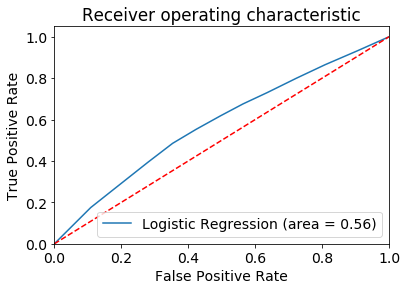

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

No of dependents	0.000065
5	Marital Status (at the time of application)	0.000106
3	Gender	0.000330
0	Age	0.000682
2	Education	0.000785
10	Type of residence	0.000902
9	Profession	0.002296these features have iv value less than 0.002 so they are of no use so dropping them and checking the accuracy 


In [0]:
##Demogrphic  done

In [0]:
# Putting feature variable to X
X = Merge_df.drop(['Application ID',"target"],axis=1).values

# Putting response variable to y
y = Merge_df['target'].values

from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt1, y_smt1 = smt.fit_sample(X, y)

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_smt1, y_smt1, test_size=0.30, random_state=101)

In [0]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on Merged_data test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on Merged_data test set: 0.63


 Metrics beyond simply accuracy

In [0]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_test, y_pred )
confusion

array([[11139,  8731],
       [ 6193, 13876]])

In [0]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [0]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6914146195625094

In [0]:
# Let us calculate specificity
TN / float(TN+FP)

0.5605938600905889

In [0]:
# Calculate false postive rate - predicting defaulter when customer does not have defaulted
print(FP/ float(TN+FP))

0.4394061399094112


In [0]:
# positive predictive value 
print (TP / float(TP+FP))

0.6137921882602734


In [0]:
# Negative predictive value
print (TN / float(TN+ FN))

0.6426840526194323


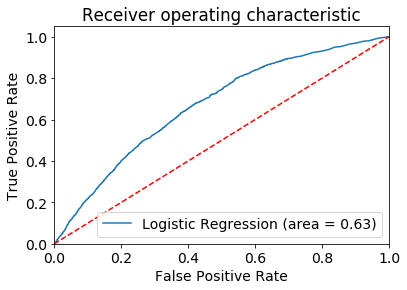

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

random Forest Algorithm on original dataset

In [0]:
Merge_df_original.isnull().sum()

Application ID                                                        0
Age                                                                   0
Gender                                                                0
Marital Status (at the time of application)                           0
No of dependents                                                      0
Income                                                                0
Education                                                             0
Profession                                                            0
Type of residence                                                     0
No of months in current residence                                     0
No of months in current company                                       0
Performance Tag                                                       0
No of times 90 DPD or worse in last 6 months                       1016
No of times 60 DPD or worse in last 6 months                    

In [0]:
Merge_df_original.dropna(subset = ['Performance Tag'], inplace = True)

In [0]:
Merge_df_original = Merge_df_original.drop_duplicates('Application ID')

In [0]:
Merge_df_original.dropna(subset= ['No of trades opened in last 6 months'], inplace = True)

In [0]:
Merge_df_original.isnull().sum()

Application ID                                                     0
Age                                                                0
Gender                                                             0
Marital Status (at the time of application)                        0
No of dependents                                                   0
Income                                                             0
Education                                                          0
Profession                                                         0
Type of residence                                                  0
No of months in current residence                                  0
No of months in current company                                    0
Performance Tag                                                    0
No of times 90 DPD or worse in last 6 months                       0
No of times 60 DPD or worse in last 6 months                       0
No of times 30 DPD or worse in las

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Random Forest first  without balancing and then balancing and hyoertunning

**[bold text](**https://**)**

In [0]:
####Random forest with woe data frame

In [0]:
#Convert categorical values to numeric using label encoder
from sklearn import preprocessing
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)

In [0]:
# Encoding the categorical variable
fit = Merge_df_original.select_dtypes(include=['object']).fillna('NA').apply(lambda x: d[x.name].fit_transform(x))

In [0]:




#Convert the categorical columns based on encoding
for i in list(d.keys()):
    Merge_df_original[i] =d[i].transform(Merge_df_original[i].fillna('NA'))


In [0]:
#from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
#visualize_classifier(model, X_smt, y_smt);


In [0]:
X=Merge_df_original.drop(["Application ID","Performance Tag"],axis=1)
y=Merge_df_original["Performance Tag"]

In [0]:
from sklearn.model_selection import train_test_split

X = Merge_df_original.iloc[:,1:Merge_df.shape[1]-1]
y = Merge_df_original.iloc[:,Merge_df.shape[1]-1]

# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

Number transactions train dataset:  47975
Number transactions test dataset:  20561
Total number of transactions:  68536


In [0]:
model = RandomForestClassifier(n_estimators=1000)

In [0]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred = model.predict(X_test)
print('Accuracy of Random forest classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of Random forest classifier on test set: 0.84


In [0]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     13048
         1.0       0.73      0.78      0.76      3514
         2.0       0.49      0.36      0.42      1761
         3.0       0.50      0.43      0.46      1245
         4.0       0.53      0.57      0.55       580
         5.0       0.56      0.62      0.59       263
         6.0       0.55      0.46      0.50       110
         7.0       0.39      0.48      0.43        31
         8.0       0.00      0.00      0.00         9

    accuracy                           0.84     20561
   macro avg       0.52      0.52      0.52     20561
weighted avg       0.83      0.84      0.83     20561

0.8404746850834104


In [0]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_test, y_pred )
confusion

array([[12795,   253,     0,     0,     0,     0,     0,     0,     0],
       [  572,  2750,   192,     0,     0,     0,     0,     0,     0],
       [    3,   739,   642,   377,     0,     0,     0,     0,     0],
       [    0,    17,   461,   533,   234,     0,     0,     0,     0],
       [    0,     0,    13,   152,   331,    84,     0,     0,     0],
       [    0,     0,     0,    12,    58,   164,    29,     0,     0],
       [    0,     0,     0,     0,     2,    43,    51,    14,     0],
       [    0,     0,     0,     0,     0,     2,    13,    15,     1],
       [    0,     0,     0,     0,     0,     0,     0,     9,     0]])

In [0]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
#FN = confusion[1,0] # false negatives

In [0]:
# Let's see the sensitivity of our randome forest model
TP / float(TP+FN)

0.6408529741863075

In [0]:
# Let us calculate specificity
TN / float(TN+FP)

0.5978173808570284

In [0]:
  # Calculate false postive rate - predicting defaulter when customer does not have defaulted
print(FP/ float(TN+FP))

In [0]:
# positive predictive value 
print (TP / float(TP+FP))

In [0]:
# Negative predictive value
print (TN / float(TN+ FN))

0.6426840526194323


Clearly, the false negative rate is much higher than the false positive rate. This demonstrates the inherent bias toward classification of the majority class in this unbalanced data set.

Using balanced RandomForestClassifier approach:
Weights are inversely proportional with the frequency of class observaton:
wj=njknj
 
where  wj  is the weight to class  j ,  n  is the number of observations,  nj  is the number of observations in class  j , and  k  is the total number of classes. In our case, that indicates that the minority class label (fraud) should be weighted higher.

In [0]:
#from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)
model = RandomForestClassifier(n_estimators=1000,class_weight="balanced")
#model.fit(X_train, y_train)
#y_pred = model.predict(X_test)

In [0]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [0]:
y_pred = model.predict(X_test)
print('Accuracy of Random forest classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of Random forest classifier on test set: 0.81


In [0]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89     19976
         1.0       0.06      0.23      0.09       891

    accuracy                           0.81     20867
   macro avg       0.51      0.53      0.49     20867
weighted avg       0.92      0.81      0.86     20867

0.8057219533234293


In [0]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_test, y_pred )
confusion

array([[16604,  3372],
       [  682,   209]])

In [0]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [0]:
# Let's see the sensitivity of our randome forest model
TP / float(TP+FN)

0.2345679012345679

In [0]:
# Let us calculate specificity
TN / float(TN+FP)

0.8311974369243091

In [0]:
# Calculate false postive rate - predicting defaulter when customer does not have defaulted
print(FP/ float(TN+FP))

0.16880256307569083


In [0]:
# positive predictive value 
print (TP / float(TP+FP))

0.05836358559061715


In [0]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9605461066759227


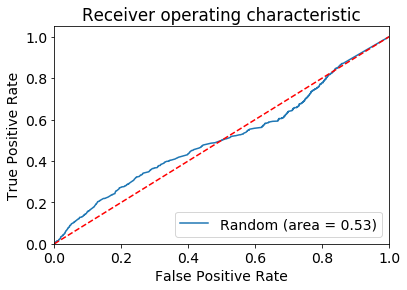

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
random_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random (area = %0.2f)' % random_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [0]:
#Hyper parameter Tuning — Modeling
#In addition, the hyperparameters of the models can be tuned to improve the performance as well. Here is a code to do that.


In [0]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(3, 10, num = 1)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf =  RandomForestClassifier(n_estimators=1000,class_weight="balanced")

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 2, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   29.6s finished


RandomizedSearchCV(cv=2, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=1000,
                                                    n_jobs=



#### Default Hyperparameters
Let's first fit a random forest model with default hyperparameters.

In [0]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(n_estimators=1000,class_weight="balanced")

In [0]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [0]:
# Making predictions
predictions = rfc.predict(X_test)

In [0]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [0]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.84      0.89     19976
         1.0       0.06      0.23      0.09       891

    accuracy                           0.81     20867
   macro avg       0.51      0.53      0.49     20867
weighted avg       0.92      0.81      0.86     20867



In [0]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[16695  3281]
 [  685   206]]


In [0]:
print(accuracy_score(y_test,predictions))

0.8099391383524225


So far so good, let's now look at the list of hyperparameters which we can tune to improve model performance.

<hr>

### Hyperparameter Tuning

<hr>

### Tuning max_depth

Let's try to find the optimum values for ```max_depth``` and understand how the value of max_depth impacts the overall accuracy of the ensemble.


In [0]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(n_estimators=1000,class_weight="balanced")


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,return_train_score=True, 
                   scoring="accuracy")
rf.fit(X_train, y_train)
#search_cv.fit(X_train, y_train)
#rf.cv_results_['mean_train_score']

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=1000, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                               

In [0]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()
#gsearch_cv.cv_results_['mean_train_score']


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.556368,0.107012,0.514994,0.013606,2,{'max_depth': 2},0.556480,0.548675,0.487883,0.540824,0.557108,0.538193,0.025847,4,0.549051,0.550489,0.492952,0.551399,0.549485,0.538675,0.022876
1,13.000115,0.072885,0.826358,0.005848,7,{'max_depth': 7},0.607722,0.604950,0.600226,0.571531,0.620173,0.600920,0.016108,3,0.611210,0.614034,0.607512,0.584262,0.620035,0.607411,0.012276
2,16.703590,0.049324,1.280080,0.010000,12,{'max_depth': 12},0.788047,0.784145,0.765147,0.767588,0.781327,0.777251,0.009172,2,0.807004,0.803024,0.789828,0.790398,0.803240,0.798699,0.007154
3,19.097663,0.146605,1.588360,0.021772,17,{'max_depth': 17},0.828301,0.824399,0.822345,0.809592,0.819125,0.820753,0.006325,1,0.850420,0.852525,0.848597,0.840026,0.842340,0.846782,0.004793


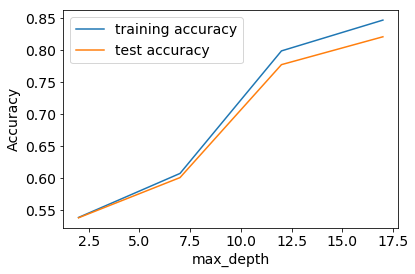

In [0]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


<hr>

### Tuning n_estimators

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.
<br>


In [0]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4,n_estimators=1000,class_weight="balanced")


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,return_train_score=True, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=1000, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                  

In [0]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.024827,0.022177,0.064300,0.001718,100,{'n_estimators': 100},0.549600,0.559252,0.554631,0.528910,0.545912,0.547662,0.010405,4,0.545919,0.562145,0.555188,0.540770,0.537265,0.548257,0.009201
1,5.035507,0.046519,0.307619,0.002138,500,{'n_estimators': 500},0.553194,0.555453,0.553091,0.532402,0.547658,0.548360,0.008381,3,0.548743,0.557036,0.553827,0.544955,0.539370,0.548786,0.006274
2,9.034406,0.050258,0.553472,0.005034,900,{'n_estimators': 900},0.555350,0.562333,0.554118,0.533121,0.542420,0.549469,0.010379,1,0.551336,0.565149,0.555367,0.545469,0.534235,0.550311,0.010283
3,13.043848,0.122737,0.795817,0.010872,1300,{'n_estimators': 1300},0.551448,0.563463,0.549497,0.532710,0.546939,0.548812,0.009847,2,0.548384,0.565175,0.549822,0.544698,0.539113,0.549438,0.008695


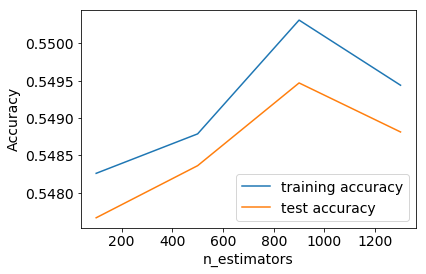

In [0]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


<hr>

### Tuning max_features

Let's see how the model performance varies with ```max_features```, which is the maximum numbre of features considered for splitting at a node.

In [0]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 13, 14, 16]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4,n_estimators=1000,class_weight="balanced")


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,n_jobs=-1, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=1000, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                  

In [0]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,16.371464,0.095837,0.943507,0.003976,4,{'max_features': 4},0.554529,0.560485,0.552886,0.531067,0.548274,0.549449,0.009987,4,0.550951,0.562479,0.554109,0.542773,0.540885,0.550239,0.007856
1,22.591325,0.201068,0.966933,0.013465,8,{'max_features': 8},0.560793,0.560998,0.552064,0.525829,0.542523,0.548442,0.013189,5,0.556394,0.563737,0.554648,0.536816,0.534749,0.549269,0.011445
2,30.453466,0.102629,0.974951,0.004959,13,{'max_features': 13},0.613165,0.559766,0.556377,0.540721,0.558135,0.565634,0.024724,3,0.608668,0.563044,0.557164,0.549525,0.552104,0.566101,0.021780
3,32.076579,0.196347,0.987239,0.013197,14,{'max_features': 14},0.617889,0.559971,0.556274,0.544213,0.571590,0.569988,0.025495,2,0.612776,0.563301,0.557139,0.553325,0.565813,0.570471,0.021608
4,32.931808,4.150884,0.912010,0.137539,16,{'max_features': 16},0.617581,0.558739,0.557096,0.553456,0.578061,0.572987,0.023881,1,0.612853,0.561426,0.558243,0.561258,0.573310,0.573418,0.020382


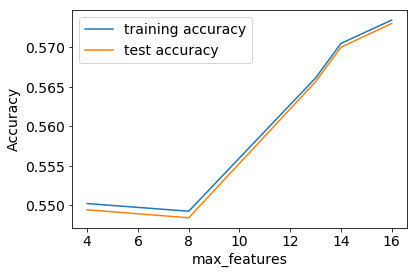

In [0]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Tuning min_samples_leaf

The hyperparameter **min_samples_leaf** is the minimum number of samples required to be at a leaf node:
- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

Let's now check the optimum value for min samples leaf in our case.

In [0]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(n_estimators=1000,class_weight="balanced")


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,return_train_score=True, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=1000, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                               

In [0]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,13.053468,0.074029,0.890141,0.049528,100,{'min_samples_leaf': 100},0.604744,0.610495,0.604128,0.576461,0.615756,0.602317,0.013603,1,0.605458,0.618501,0.613315,0.587677,0.613822,0.607755,0.010878
1,12.672261,0.047972,0.815745,0.002978,150,{'min_samples_leaf': 150},0.594886,0.590265,0.594578,0.570196,0.602301,0.590445,0.010839,2,0.592467,0.597217,0.601941,0.577818,0.600190,0.593927,0.008671
2,12.443864,0.146481,0.808998,0.032337,200,{'min_samples_leaf': 200},0.581947,0.578558,0.587492,0.554483,0.598192,0.580134,0.014449,3,0.579784,0.582557,0.592339,0.564211,0.595492,0.582876,0.011016
3,11.825734,0.083383,0.761792,0.000957,250,{'min_samples_leaf': 250},0.579791,0.579585,0.576915,0.553148,0.597371,0.577362,0.014125,4,0.579501,0.583122,0.581940,0.562798,0.591127,0.579698,0.009306
4,11.585478,0.067465,0.745512,0.001543,300,{'min_samples_leaf': 300},0.579996,0.578045,0.574964,0.556332,0.593878,0.576643,0.012046,5,0.578295,0.580785,0.578012,0.565648,0.587456,0.578039,0.007068


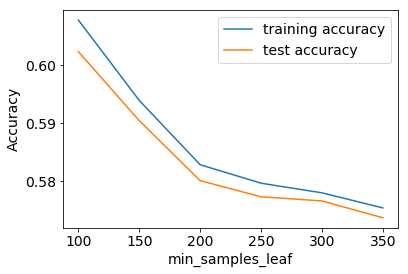

In [0]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

You can see that the model starts of overfit as you decrease the value of min_samples_leaf. 

### Tuning min_samples_split

Let's now look at the performance of the ensemble as we vary min_samples_split.

In [0]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(n_estimators=1000,class_weight="balanced")


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,return_train_score=True, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=1000, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                               

In [0]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,15.652395,0.080343,1.189185,0.007922,200,{'min_samples_split': 200},0.658246,0.655268,0.647464,0.625141,0.638147,0.644854,0.012068,1,0.661378,0.663380,0.660017,0.636893,0.644836,0.653301,0.010515
1,15.287144,0.133950,1.157547,0.036503,250,{'min_samples_split': 250},0.649723,0.642637,0.639762,0.624422,0.631060,0.637521,0.008870,2,0.652623,0.647924,0.651134,0.634608,0.636723,0.644602,0.007483
2,15.042211,0.069129,1.117284,0.015586,300,{'min_samples_split': 300},0.628568,0.633190,0.632676,0.612920,0.622535,0.625978,0.007562,3,0.632237,0.641865,0.643072,0.622747,0.625504,0.633085,0.008269
3,14.927764,0.128340,1.081704,0.005125,350,{'min_samples_split': 350},0.621688,0.625796,0.631238,0.600596,0.612469,0.618358,0.010793,4,0.625716,0.634214,0.640479,0.610141,0.611050,0.624320,0.012150
4,14.899991,0.240868,1.061266,0.010642,400,{'min_samples_split': 400},0.617991,0.623742,0.623639,0.599363,0.608566,0.614661,0.009437,5,0.621146,0.630671,0.634240,0.608652,0.606557,0.620253,0.011199


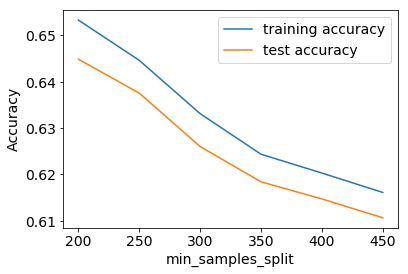

In [0]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<hr>

## Grid Search to Find Optimal Hyperparameters

We can now find the optimal hyperparameters using GridSearchCV.

In [0]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier(n_estimators=1000,class_weight="balanced")
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [0]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  8.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=1000, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                               

In [0]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.6245404317374248 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


**Fitting the final model with the best parameters obtained from grid search.**

In [0]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=200,class_weight="balanced")

In [0]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features=10,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=200, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [0]:
# predict
predictions = rfc.predict(X_test)

In [0]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.6245404317374248 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [0]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.97      0.60      0.74     19976
         1.0       0.07      0.64      0.12       891

    accuracy                           0.60     20867
   macro avg       0.52      0.62      0.43     20867
weighted avg       0.94      0.60      0.71     20867



In [0]:
print(confusion_matrix(y_test,predictions))

[[11942  8034]
 [  320   571]]


In [0]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_test,predictions )
confusion

array([[11942,  8034],
       [  320,   571]])

In [0]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [0]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6408529741863075

In [0]:
# Let us calculate specificity
TN / float(TN+FP)

0.5978173808570284

In [0]:
# Calculate false postive rate - predicting defaulter when customer does not have defaulted
print(FP/ float(TN+FP))

0.40218261914297154


In [0]:
# positive predictive value 
print (TP / float(TP+FP))

0.0663567693201627


In [0]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9739031153156092


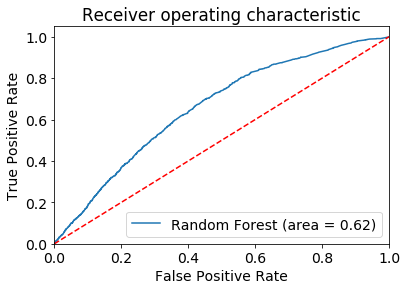

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
random_roc_auc = roc_auc_score(y_test, rfc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % random_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Scorecard preparing

In [0]:
#scorecard

In [0]:
Merge_df.shape

(69554, 18)

In [0]:
from imblearn.combine import SMOTETomek



X = Merge_df.drop(["target"],axis=1)


# Putting response variable to y
y = Merge_df['target'].values

# Splitting the data into train and test
merge_df_X_train, merge_df_X_test, merge_df_y_train, merge_df_y_test = train_test_split(X, y, test_size=0.30, random_state=101)



In [0]:
X_train_sm = merge_df_X_train.drop('Application ID', axis = 1)
X_test_sm = merge_df_X_test.drop('Application ID', axis = 1)

smt = SMOTETomek(ratio='auto')
X_train, y_train = smt.fit_sample(X_train_sm, merge_df_y_train)
X_test, y_test = smt.fit_sample(X_test_sm,merge_df_y_test)

In [0]:
from sklearn import metrics
logreg_final = LogisticRegression()
logreg_final.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
### getting the threshold frequency
y_train_pred = logreg_final.predict(X_train)

In [0]:
## printing the logistic coefficinet for parameters
logreg_final.coef_[0]
## now use these coefficients below with their respected parameters

array([ 0.47025741,  0.30780663,  0.36781735, -0.12783254,  0.16816965,
        0.13457553,  0.1095994 ,  0.21270852,  0.15656903,  0.03589293,
       -0.04000968,  0.1541182 ,  0.01323632,  0.3733857 , -0.15726297,
       -0.1017808 ])

In [0]:
## printing the logistic coefficinet for parameter
coefficients = pd.DataFrame({'Parameter':X_train_sm.columns,'Estimate': np.transpose(logreg_final.coef_[0])})
coefficients
## now use these coefficients below with their respected parameters

,Parameter,Estimate
0,new_Avgas CC Utilization in last 12 months,0.470257
1,new_Income,0.307807
2,new_No of Inquiries in last 12 months (excludi...,0.367817
3,new_No of Inquiries in last 6 months (excludin...,-0.127833
4,new_No of PL trades opened in last 12 months,0.168170
5,new_No of PL trades opened in last 6 months,0.134576
6,new_No of months in current residence,0.109599
7,new_No of times 30 DPD or worse in last 12 months,0.212709
8,new_No of times 30 DPD or worse in last 6 months,0.156569
9,new_No of times 60 DPD or worse in last 12 months,0.035893


In [0]:
#final_iv1 = final_iv1[final_iv1['IV']>0.02]

In [0]:
# lr_woe_mod_params = pd.DataFrame(lr_woe_model['SelectedModel.ParameterEstimates'])
# lr_woe_mod_params = lr_woe_mod_params[['Parameter','Estimate']]
lr_woe_mod_params = coefficients
intercept = logreg.intercept_

In [0]:
woe_transform_df = Merge_df

In [0]:
# Filter WOE Transform Table to Only Selected Features from Logistic Regression
selected_params = lr_woe_mod_params['Parameter']

woe_transform_df_selected = woe_transform_df[selected_params]

In [0]:
# Ensure Shapes are Correct for Matrix Multiplication
display(woe_transform_df_selected.shape)
display(lr_woe_mod_params.shape)

(69554, 16)

(16, 2)

In [0]:

# Set Parameter Name as Index
lr_woe_mod_params_index = lr_woe_mod_params.set_index('Parameter')

In [0]:
# Multiply lr coefficients to observation WOE Values
scorecard = woe_transform_df_selected[lr_woe_mod_params_index.index].apply(lambda x: x*lr_woe_mod_params_index['Estimate'].T,axis=1)

In [0]:
# Get Logit Values
scorecard['logit'] = scorecard[list(scorecard.columns)].sum(axis=1) + intercept

In [0]:
# Convert Logit to Odds Ratio and Odds Ratio to Probability
scorecard['odds'] = np.exp(scorecard['logit'])
scorecard['probs'] = scorecard['odds'] / (scorecard['odds'] + 1)

In [0]:
# Set up Scoring Logic
target_score = 400
target_odds = 10
pts_double_odds = 20

factor = pts_double_odds / np.log(2)
offset = target_score - factor * np.log(target_odds)

In [0]:
# Score
scorecard['score'] = offset + factor * scorecard['logit']

In [0]:
# Add Back Application ID and Target Features
scorecard['Application ID'] = woe_transform_df['Application ID']
scorecard['target'] = woe_transform_df['target']

In [0]:
final_scorecard = scorecard[scorecard['score'] <= 400]

In [0]:
# Preview Score Data (Scores, Odds, Probs, etc)
final_scorecard[final_scorecard['target'] == 1].head(5)

,new_Avgas CC Utilization in last 12 months,new_Income,new_No of Inquiries in last 12 months (excluding home & auto loans),new_No of Inquiries in last 6 months (excluding home & auto loans),new_No of PL trades opened in last 12 months,new_No of PL trades opened in last 6 months,new_No of months in current residence,new_No of times 30 DPD or worse in last 12 months,new_No of times 30 DPD or worse in last 6 months,new_No of times 60 DPD or worse in last 12 months,new_No of times 60 DPD or worse in last 6 months,new_No of times 90 DPD or worse in last 12 months,new_No of times 90 DPD or worse in last 6 months,new_No of trades opened in last 12 months,new_No of trades opened in last 6 months,new_Total No of Trades,logit,odds,probs,score,Application ID,target
320,-0.274816,0.016605,-0.298818,0.040177,-0.075201,-0.041843,0.022848,-0.05672,-0.030731,-0.007137,0.004805,-0.020382,-0.000477,-0.318224,0.041846,0.068884,-0.940400,0.390472,0.280820,306.427223,651753616,1.0
1105,-0.339065,0.016605,-0.298818,0.040177,-0.075201,-0.041843,0.022848,-0.05672,-0.030731,-0.007137,0.004805,-0.020382,-0.000477,-0.318224,0.041846,0.068884,-1.004649,0.366173,0.268028,304.573404,307322626,1.0
1144,-0.274816,-0.080756,-0.298818,0.040177,-0.075201,-0.041843,0.022848,-0.05672,-0.030731,-0.007137,0.004805,-0.020382,-0.000477,-0.318224,0.041846,0.068884,-1.037762,0.354247,0.261582,303.617969,650067397,1.0
1246,-0.339065,0.016605,-0.298818,0.040177,-0.075201,-0.041843,0.022848,-0.05672,-0.030731,-0.007137,0.004805,-0.020382,-0.000477,-0.318224,0.041846,0.068884,-1.004649,0.366173,0.268028,304.573404,324749417,1.0
1535,-0.274816,0.017196,-0.298818,0.040177,-0.075201,-0.041843,0.022848,-0.05672,-0.030731,-0.007137,0.004805,-0.020382,-0.000477,-0.318224,0.041846,0.068884,-0.939810,0.390702,0.280939,306.444258,288114177,1.0


In [0]:

fpr, tpr, thresholds = metrics.roc_curve(y_test, logreg_final.predict_proba(X_test)[:,1])
cut_off_prediction_probability_score = thresholds[np.argmax(tpr-fpr)]
cut_off_score = np.round(offset+(factor*np.log(cut_off_prediction_probability_score/(1-cut_off_prediction_probability_score))))
print("Cut off score",cut_off_score,"\ncut_off_prediction_probability_score",cut_off_prediction_probability_score)
#Print()

Cut off score 339.0 
cut_off_prediction_probability_score 0.5456705776528065


In [0]:
final_scorecard['score'].mean()

327.8005667532831

In [0]:
final_scorecard['score'].min()

297.6989007242953

In [0]:
c

366.5862905547323

Text(0, 0.5, 'Count')

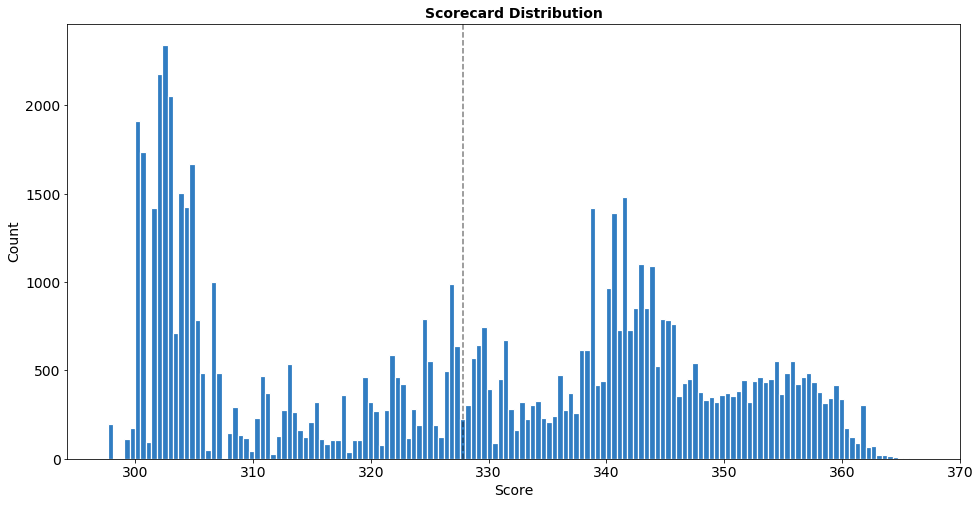

In [0]:
# Plot Distribution of Scores
plt.figure(figsize=(16,8))

plt.hist(final_scorecard['score'],
         bins=150,
         edgecolor='white',
         color = '#317DC2',
         linewidth=1.2)

#plt.xlim(231,750)
plt.title('Scorecard Distribution', fontweight="bold", fontsize=14)
plt.axvline(final_scorecard['score'].mean(), color='k', linestyle='dashed', linewidth=1.5, alpha=0.5)
#plt.text(458, 2970, 'Mean Score: 456', color='red', fontweight='bold', style='italic', fontsize=8)
plt.xlabel('Score')
plt.ylabel('Count')


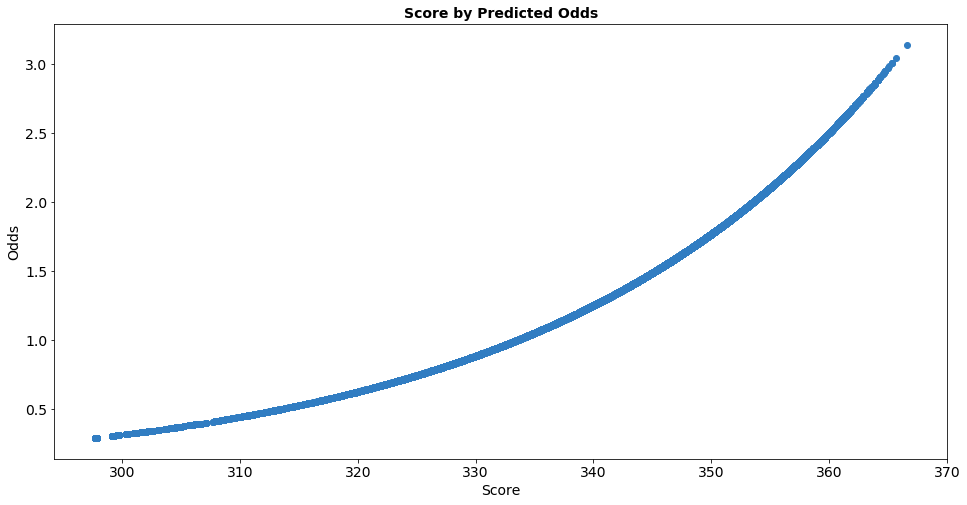

In [0]:
# Plot Scores Against Predicted Odds (Exponential Relationship)
plt.figure(figsize=(16,8))

plt.scatter(x='score',
            y='odds',
            data=scorecard,
            color='#317DC2')

plt.title('Score by Predicted Odds', fontweight="bold", fontsize=14)
plt.xlabel('Score')
plt.ylabel('Odds');

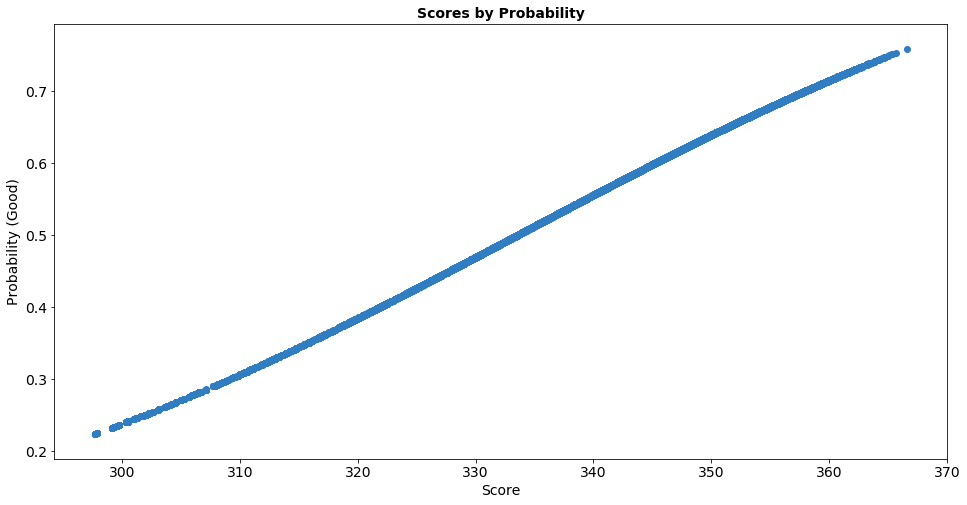

In [0]:
# Plot Scores Against Probabilities
plt.figure(figsize=(16,8))

plt.scatter(x='score',
            y='probs',
            data=scorecard,
            color='#317DC2')

plt.title('Scores by Probability', fontweight="bold", fontsize=14)
plt.xlabel('Score')
plt.ylabel('Probability (Good)');

###Process Repeat
###We have 1425 records in NA.Performance.Tag Data Frame having No Performance Tag. We need to predict the performance value for these records
#by passing through the best model created above. Then we will club the complete data and create the best model from that.
#This requires the entire process we implemented above to repeat.
  
#Initially, we need to find the WOE Values of the NA.Performance.Tag. For this, we need to map it to IV Values created above.


In [0]:

df_reject_app_demo=demo_original[demo_original["Performance Tag"].isnull()]

In [0]:
df_reject_app_demo.head(5)

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
69603,906908303,35,M,Single,1.0,6.0,Bachelor,SAL,Rented,22,18,NaN
69604,10990583,47,F,Married,4.0,12.0,Masters,SE,Rented,122,25,NaN
69605,589678446,46,M,Married,3.0,7.0,Professional,SE,Rented,10,31,NaN
69606,809411322,41,M,Married,3.0,18.0,Masters,SAL,Rented,6,47,NaN
69607,150246616,42,F,Married,4.0,17.0,Phd,SAL,Rented,8,49,NaN


In [0]:
Rejected_App_df= df_reject_app_demo.merge(credit_original,on=['Application ID',"Performance Tag"],how='left')


In [0]:
Rejected_App_df.head(5)

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan
0,906908303,35,M,Single,1.0,6.0,Bachelor,SAL,Rented,22,18,NaN,0,0,2,1,2,3,30.0,4.0,12,3,7,2,4,0.0,1309623.0,13,0
1,10990583,47,F,Married,4.0,12.0,Masters,SE,Rented,122,25,NaN,1,1,1,3,2,2,16.0,3.0,7,3,4,3,5,0.0,775626.0,7,0
2,589678446,46,M,Married,3.0,7.0,Professional,SE,Rented,10,31,NaN,3,4,5,3,5,6,83.0,2.0,7,2,4,0,3,0.0,732602.0,8,0
3,809411322,41,M,Married,3.0,18.0,Masters,SAL,Rented,6,47,NaN,1,3,4,3,4,5,87.0,2.0,7,1,4,4,5,0.0,842057.0,8,0
4,150246616,42,F,Married,4.0,17.0,Phd,SAL,Rented,8,49,NaN,2,2,4,3,2,6,42.0,3.0,7,2,3,3,6,0.0,786997.0,7,1


In [0]:
Rejected_App_df.columns

Index(['Application ID', 'Age', 'Gender',
       'Marital Status (at the time of application)', 'No of dependents',
       'Income', 'Education', 'Profession ', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'Performance Tag', 'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loan

In [0]:
#Replacing IV and WOE values to rejected dataframe

In [0]:
Rejected_App_df = Rejected_App_df.drop('Performance Tag', axis =1)

In [0]:
#Rejected_App_df=Rejected_App_df.dropna(0)
Rejected_App_df.shape

(1425, 28)

In [0]:
Rejected_App_df.isnull().sum()

Application ID                                                      0
Age                                                                 0
Gender                                                              0
Marital Status (at the time of application)                         0
No of dependents                                                    0
Income                                                              0
Education                                                           1
Profession                                                          1
Type of residence                                                   0
No of months in current residence                                   0
No of months in current company                                     0
No of times 90 DPD or worse in last 6 months                        0
No of times 60 DPD or worse in last 6 months                        0
No of times 30 DPD or worse in last 6 months                        0
No of times 90 DPD o

In [0]:
original_cols_Rejected_app = [x for x in list(Rejected_App_df.columns) if x not in ('Application ID','Performance Tag')]
original_cols_Rejected_app
# original_cols = original_cols.remove('Performance Tag')

['Age',
 'Gender',
 'Marital Status (at the time of application)',
 'No of dependents',
 'Income',
 'Education',
 'Profession ',
 'Type of residence',
 'No of months in current residence',
 'No of months in current company',
 'No of times 90 DPD or worse in last 6 months',
 'No of times 60 DPD or worse in last 6 months',
 'No of times 30 DPD or worse in last 6 months',
 'No of times 90 DPD or worse in last 12 months',
 'No of times 60 DPD or worse in last 12 months',
 'No of times 30 DPD or worse in last 12 months',
 'Avgas CC Utilization in last 12 months',
 'No of trades opened in last 6 months',
 'No of trades opened in last 12 months',
 'No of PL trades opened in last 6 months',
 'No of PL trades opened in last 12 months',
 'No of Inquiries in last 6 months (excluding home & auto loans)',
 'No of Inquiries in last 12 months (excluding home & auto loans)',
 'Presence of open home loan',
 'Outstanding Balance',
 'Total No of Trades',
 'Presence of open auto loan']

In [0]:
# Rejected_App_df["target"]=Rejected_App_df["Performance Tag"]
# Rejected_App_df=Rejected_App_df.drop("Performance Tag",axis=1)
                

In [0]:
transform_vars_list =Rejected_App_df.columns
transform_prefix = 'new_' # leave this value blank if you need replace the original column values

In [0]:
transform_vars_list

Index(['Application ID', 'Age', 'Gender',
       'Marital Status (at the time of application)', 'No of dependents',
       'Income', 'Education', 'Profession ', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Presen

In [0]:
for var in transform_vars_list:
    small_df = final_iv_merge[final_iv_merge['VAR_NAME'] == var]
    transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            Rejected_App_df[transform_prefix + var] = Rejected_App_df[var].apply(lambda x: eval(replace_cmd))
        except:
            Rejected_App_df[transform_prefix + var] = Rejected_App_df[var].apply(lambda x: eval(replace_cmd1))

In [0]:
Rejected_App_df.head(5)

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,new_Income,new_No of months in current residence,new_No of times 90 DPD or worse in last 6 months,new_No of times 60 DPD or worse in last 6 months,new_No of times 30 DPD or worse in last 6 months,new_No of times 90 DPD or worse in last 12 months,new_No of times 60 DPD or worse in last 12 months,new_No of times 30 DPD or worse in last 12 months,new_Avgas CC Utilization in last 12 months,new_No of trades opened in last 6 months,new_No of trades opened in last 12 months,new_No of PL trades opened in last 6 months,new_No of PL trades opened in last 12 months,new_No of Inquiries in last 6 months (excluding home & auto loans),new_No of Inquiries in last 12 months (excluding home & auto loans),new_Total No of Trades
0,906908303,35,M,Single,1.0,6.0,Bachelor,SAL,Rented,22,18,0,0,2,1,2,3,30.0,4.0,12,3,7,2,4,0.0,1309623.0,13,0,0.292616,0.208472,-0.036002,-0.120088,0.738002,-0.132252,0.690407,0.706709,0.314546,0.349633,0.363140,0.396741,0.391676,0.288232,0.181740,0.327574
1,10990583,47,F,Married,4.0,12.0,Masters,SE,Rented,122,25,1,1,1,3,2,2,16.0,3.0,7,3,4,3,5,0.0,775626.0,7,0,0.055865,0.208472,-0.036002,-0.120088,-0.196277,0.717904,0.690407,0.706709,0.314546,0.349633,0.227336,0.396741,0.391676,0.288232,0.362916,0.209475
2,589678446,46,M,Married,3.0,7.0,Professional,SE,Rented,10,31,3,4,5,3,5,6,83.0,2.0,7,2,4,0,3,0.0,732602.0,8,0,0.292616,-0.253994,0.825728,0.739292,0.738002,0.717904,0.690407,0.706709,0.498864,-0.266086,0.227336,0.396741,0.391676,-0.314296,0.181740,0.209475
3,809411322,41,M,Married,3.0,18.0,Masters,SAL,Rented,6,47,1,3,4,3,4,5,87.0,2.0,7,1,4,4,5,0.0,842057.0,8,0,0.055865,-0.253994,-0.036002,0.739292,0.738002,0.717904,0.690407,0.706709,0.498864,-0.266086,0.227336,-0.310928,0.391676,0.288232,0.362916,0.209475
4,150246616,42,F,Married,4.0,17.0,Phd,SAL,Rented,8,49,2,2,4,3,2,6,42.0,3.0,7,2,3,3,6,0.0,786997.0,7,1,0.055865,-0.253994,0.825728,0.739292,0.738002,0.717904,0.690407,0.706709,0.314546,0.349633,0.227336,0.396741,0.391676,0.288232,0.362916,0.209475


In [0]:
Rejected_App_df.drop(original_cols_Rejected_app, axis = 1, inplace = True)

In [0]:
Rejected_App_df.shape

(1425, 18)

IMPUTED WO to rejected dapplication dataframe



---



In [0]:
X_to_be_pred = Rejected_App_df.drop('Application ID', axis = 1)
X_pred = X_to_be_pred.to_numpy()

In [0]:
y_test_pred = logreg.predict(X_pred)

In [0]:
y_test_pred[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [0]:
# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)

In [0]:
y_test_pred.head()

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [0]:
# Putting CustID to index
y_test_pred['Appication ID'] = y_test_pred.index

In [0]:
X_pred

array([[ 0.29261587,  0.20847193, -0.03600174, ...,  0.28823238,
         0.18174017,  0.32757425],
       [ 0.05586497,  0.20847193, -0.03600174, ...,  0.28823238,
         0.36291637,  0.20947451],
       [ 0.29261587, -0.25399441,  0.82572827, ..., -0.31429629,
         0.18174017,  0.20947451],
       ...,
       [ 0.29261587,  0.20847193, -0.03600174, ...,  0.28823238,
         0.18174017,  0.20947451],
       [-0.030201  , -0.25399441, -0.03600174, ...,  0.28823238,
         0.18174017,  0.20947451],
       [ 0.29261587, -0.25399441,  0.82572827, ...,  0.28823238,
         0.18174017,  0.20947451]])

In [0]:
y_pred = logreg_final.predict(X_pred)

In [0]:
y_pred
# Converting y_pred to a dataframe which is an array
y_pred = pd.DataFrame(y_pred)

In [0]:
y_pred.head()

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [0]:
Rejected_App_df['Performance Tag'] = y_pred

In [0]:
## defaulters among the rejected applications
Rejected_App_df[Rejected_App_df['Performance Tag']==1].shape

(1396, 18)

In [0]:
### ## non-defaulters among the rejected applications
Rejected_App_df[Rejected_App_df['Performance Tag']==0].shape

(29, 18)

In [0]:
## checking for the predicted performace tags for all the appication ID to analyse
## with respect to the previous given Performance Tags
y_test_pred= logreg_final.predict(X_test)

In [0]:
y_test_pred

array([0., 1., 0., ..., 1., 1., 1.])

In [0]:
y_train_pred = logreg_final.predict(X_train)

In [0]:
Test_ID = X_test['Application ID']
Test_ID.shape

(1425,)

In [0]:
X_test_orignal = Rejected_App_df
X_test.shape

(1425, 18)

In [0]:
X_test=Rejected_App_df.drop(["Application ID","Performance Tag"],axis=1)

In [0]:
pred=logreg_final.predict(X_test)

In [0]:
#scorecard for rejected applications

In [0]:
### getting the threshold frequency
y_train_pred = logreg_final.predict(X_test)

In [0]:
## printing the logistic coefficinet for parameters
logreg_final.coef_[0]
## now use these coefficients below with their respected parameters

array([ 0.47025741,  0.30780663,  0.36781735, -0.12783254,  0.16816965,
        0.13457553,  0.1095994 ,  0.21270852,  0.15656903,  0.03589293,
       -0.04000968,  0.1541182 ,  0.01323632,  0.3733857 , -0.15726297,
       -0.1017808 ])

In [0]:
## printing the logistic coefficinet for parameter
coefficients = pd.DataFrame({'Parameter':X_train_sm.columns,'Estimate': np.transpose(logreg_final.coef_[0])})
coefficients
## now use these coefficients below with their respected parameters

,Parameter,Estimate
0,new_Avgas CC Utilization in last 12 months,0.470257
1,new_Income,0.307807
2,new_No of Inquiries in last 12 months (excludi...,0.367817
3,new_No of Inquiries in last 6 months (excludin...,-0.127833
4,new_No of PL trades opened in last 12 months,0.168170
5,new_No of PL trades opened in last 6 months,0.134576
6,new_No of months in current residence,0.109599
7,new_No of times 30 DPD or worse in last 12 months,0.212709
8,new_No of times 30 DPD or worse in last 6 months,0.156569
9,new_No of times 60 DPD or worse in last 12 months,0.035893


In [0]:
# lr_woe_mod_params = pd.DataFrame(lr_woe_model['SelectedModel.ParameterEstimates'])
# lr_woe_mod_params = lr_woe_mod_params[['Parameter','Estimate']]
lr_woe_mod_params = coefficients
intercept = logreg.intercept_

In [0]:
woe_transform_df_rejected = Rejected_App_df

In [0]:
# Filter WOE Transform Table to Only Selected Features from Logistic Regression
selected_params = lr_woe_mod_params['Parameter']

woe_transform_df_selected = woe_transform_df[selected_params]

In [0]:
# Ensure Shapes are Correct for Matrix Multiplication
display(woe_transform_df_selected.shape)
display(lr_woe_mod_params.shape)

(1425, 16)

(16, 2)

In [0]:

# Set Parameter Name as Index
lr_woe_mod_params_index = lr_woe_mod_params.set_index('Parameter')

In [0]:
# Multiply lr coefficients to observation WOE Values
scorecard_rejected= woe_transform_df_selected[lr_woe_mod_params_index.index].apply(lambda x: x*lr_woe_mod_params_index['Estimate'].T,axis=1)

In [0]:
# Get Logit Values
scorecard_rejected['logit'] = scorecard_rejected[list(scorecard_rejected.columns)].sum(axis=1) + intercept

In [0]:
# Convert Logit to Odds Ratio and Odds Ratio to Probability
scorecard_rejected['odds'] = np.exp(scorecard_rejected['logit'])
scorecard_rejected['probs'] = scorecard_rejected['odds'] / (scorecard_rejected['odds'] + 1)

In [0]:
# Set up Scoring Logic
target_score = 400
target_odds = 10
pts_double_odds = 20

factor = pts_double_odds / np.log(2)
offset = target_score - factor * np.log(target_odds)

In [0]:
# Score
scorecard_rejected['score'] = offset + factor * scorecard_rejected['logit']

In [0]:
# Add Back Application ID and Target Features
scorecard_rejected['Application ID'] = woe_transform_df['Application ID']
scorecard_rejected['target'] = woe_transform_df['Performance Tag']

In [0]:
scorecard_rejected.shape

(1425, 22)

In [0]:
final_scorecard_rejected = scorecard[scorecard['score'] <= 400]

In [0]:
# Preview Score Data (Scores, Odds, Probs, etc)
final_scorecard_rejected[final_scorecard_rejected['target'] == 1].head(5)

,new_Avgas CC Utilization in last 12 months,new_Income,new_No of Inquiries in last 12 months (excluding home & auto loans),new_No of Inquiries in last 6 months (excluding home & auto loans),new_No of PL trades opened in last 12 months,new_No of PL trades opened in last 6 months,new_No of months in current residence,new_No of times 30 DPD or worse in last 12 months,new_No of times 30 DPD or worse in last 6 months,new_No of times 60 DPD or worse in last 12 months,new_No of times 60 DPD or worse in last 6 months,new_No of times 90 DPD or worse in last 12 months,new_No of times 90 DPD or worse in last 6 months,new_No of trades opened in last 12 months,new_No of trades opened in last 6 months,new_Total No of Trades,logit,odds,probs,score,Application ID,target
320,-0.274816,0.016605,-0.298818,0.040177,-0.075201,-0.041843,0.022848,-0.05672,-0.030731,-0.007137,0.004805,-0.020382,-0.000477,-0.318224,0.041846,0.068884,-0.940400,0.390472,0.280820,306.427223,651753616,1.0
1105,-0.339065,0.016605,-0.298818,0.040177,-0.075201,-0.041843,0.022848,-0.05672,-0.030731,-0.007137,0.004805,-0.020382,-0.000477,-0.318224,0.041846,0.068884,-1.004649,0.366173,0.268028,304.573404,307322626,1.0
1144,-0.274816,-0.080756,-0.298818,0.040177,-0.075201,-0.041843,0.022848,-0.05672,-0.030731,-0.007137,0.004805,-0.020382,-0.000477,-0.318224,0.041846,0.068884,-1.037762,0.354247,0.261582,303.617969,650067397,1.0
1246,-0.339065,0.016605,-0.298818,0.040177,-0.075201,-0.041843,0.022848,-0.05672,-0.030731,-0.007137,0.004805,-0.020382,-0.000477,-0.318224,0.041846,0.068884,-1.004649,0.366173,0.268028,304.573404,324749417,1.0
1535,-0.274816,0.017196,-0.298818,0.040177,-0.075201,-0.041843,0.022848,-0.05672,-0.030731,-0.007137,0.004805,-0.020382,-0.000477,-0.318224,0.041846,0.068884,-0.939810,0.390702,0.280939,306.444258,288114177,1.0


In [0]:
final_scorecard_rejected['score'].mean()

327.8005667532831

In [0]:
final_scorecard_rejected['score'].min()

297.6989007242953

In [0]:
final_scorecard_rejected['score'].max()

366.5862905547323